In [47]:
import numpy as np
import numpy.linalg
import pandas as pd
import sklearn
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics, sklearn.decomposition
import scipy.spatial
import matplotlib.pyplot as plt
import seaborn as sns

# SVD decomposition and dimension reduction

In [48]:
X = pd.read_csv('bars.csv', header=None).values
X_noise_20 = pd.read_csv('bars_noise20.csv', header=None).values
X_noise_50 = pd.read_csv('bars_noise50.csv', header=None).values

In [49]:
X.shape

(10000, 64)

In [50]:
X[1]

array([  0,   0, 255,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,
         0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0,
       255,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255,
       255,   0,   0, 255,   0,   0,   0,   0,   0, 255, 255, 255, 255,
       255, 255, 255, 255,   0,   0, 255,   0,   0,   0,   0,   0],
      dtype=int64)

In [51]:
X_noise_20[1]

array([  0,   0, 225,   0,   0,   0,  48,   0,  44,   0, 220,  70,   0,
        54,   0,  70,   6,   0, 186,   0,   0,   0,   0,  48,   8,   0,
       255,  15,   0,   0,  14,  60, 255, 173, 193, 225, 255, 169, 164,
       255,   0,  80, 166,  81,   0,   0,   8, 112, 255, 241, 255, 255,
       236, 255, 255, 255,   0,   0, 255,   1,   0,   6, 120,   5],
      dtype=int64)

In [52]:
def show_image(x):
    plt.imshow(x.reshape((8,8)), cmap='Greys')

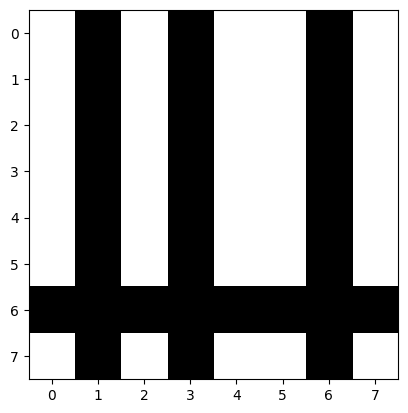

In [53]:
show_image(X[2])

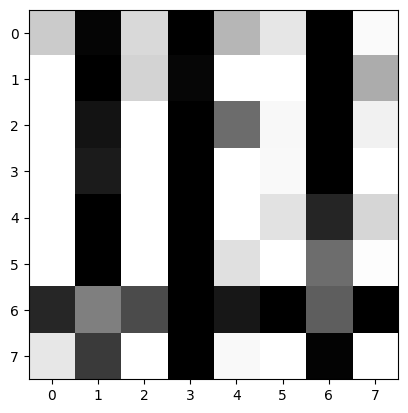

In [54]:
show_image(X_noise_20[2])

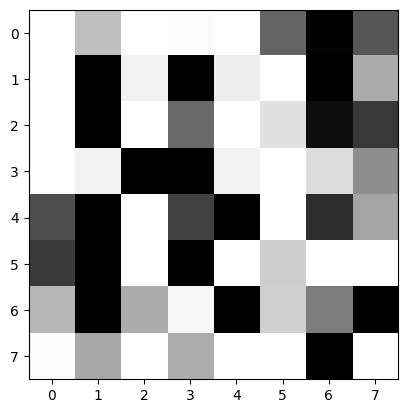

In [55]:
show_image(X_noise_50[2])

## SVD decompostioton

In [56]:
U, s, V_T = np.linalg.svd(X, full_matrices=True)
U.shape, s.shape, V_T.shape

((10000, 10000), (64,), (64, 64))

In [57]:
s

array([85163.72992057, 25918.78802989, 25885.20650461, 25866.61111402,
       25603.09250067, 25527.33634786, 25461.90923658, 25400.16904854,
       25323.96794768, 25273.05247869, 25090.65260469, 24985.09443308,
       24828.21166745, 24725.47151278, 24599.19377668,  4800.23207891,
        4759.42568525,  4752.02282845,  4714.65694697,  4693.37727937,
        4671.65765993,  4664.8800508 ,  4649.71482489,  4645.60988442,
        4627.47548092,  4613.28613569,  4608.32596123,  4601.90708787,
        4598.48440201,  4592.10180099,  4566.68918604,  4564.57307661,
        4539.47946295,  4528.18799301,  4515.34355164,  4503.88836915,
        4496.2987919 ,  4490.36008691,  4475.56266412,  4466.33868976,
        4461.80509601,  4454.28225144,  4444.18087738,  4433.82306676,
        4426.93951122,  4412.70949494,  4410.35912898,  4407.39023681,
        4392.68325091,  4367.7956838 ,  4356.32995984,  4352.68991712,
        4343.81015817,  4333.71349581,  4328.56992482,  4316.97332939,
      

What does the values in vector **s** represent?

s = je to vektor, pokud by to byla matice, tak ta cisla budou na diagonale, ted mame ale vektor, protoze mame jen 64 hodnot, nikoli 64 a 64.
pokud se dela redukce dimenze, tak obrazek je 8x8, pokud ji chci redukovat, misto 64 cisel budu chtit mene, treab 10, tak si vezmu prvnich 10 cisel (obecne cca plati, ze cim vyssi cislo je, tim je dulezitejsi) - pokud teda delam redukci na 10 atributu, tak si vezmu prvnich 10 hodnot z vektoru

### Reconstruct complete matrix and check error

In [58]:
np.diag(s)

array([[85163.72992057,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        , 25918.78802989,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        , 25885.20650461, ...,
            0.        ,     0.        ,     0.        ],
       ...,
       [    0.        ,     0.        ,     0.        , ...,
         4218.36279764,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,  4216.42652516,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,  4141.90618514]])

pokud jsou ve vysledku cisla na -13, -14, tak jsou vtam v podstate nuly, takze good

In [59]:
R = U[:, :64].dot(np.diag(s)).dot(V_T)
X-R

array([[-7.42451218e-14,  1.34890883e-11,  1.12801177e-11, ...,
         2.33058017e-12,  1.42108547e-13,  1.16529009e-12],
       [-1.16351730e-13, -6.08428131e-14,  8.98126018e-11, ...,
         4.23754961e-11,  4.95545421e-11,  3.49177856e-11],
       [-3.28572497e-13,  6.53699317e-13,  2.75249927e-12, ...,
         5.93366462e-12,  1.12549969e-11,  1.03544795e-11],
       ...,
       [-2.07221777e-13, -2.55795385e-13,  1.56319402e-12, ...,
         3.73625978e-14,  5.76121511e-13, -4.11166629e-13],
       [-3.97903932e-13, -2.58847074e-13, -5.66230302e-13, ...,
        -1.39041076e-12, -1.09297032e-12,  3.97903932e-13],
       [-2.15047497e-13,  1.76245816e-13, -1.10733826e-13, ...,
        -5.68434189e-14, -5.68434189e-14, -2.84217094e-13]])

### Use only 5 main vectors (which represent reduction to 5 dimensions). Create reconstructed matrix and compare it with original one.
- https://csiu.github.io/blog//img/figure/2017-04-16/svd.png
![obrazek.png](attachment:0ff07704-dd0e-49bc-8839-322f279a3c6f.png)

In [60]:
U[:, :5]

array([[-0.01089724,  0.02019641, -0.00491279,  0.01643246,  0.00838835],
       [-0.00824357,  0.01339253, -0.01285844,  0.0033604 ,  0.00822905],
       [-0.01084728, -0.005671  , -0.01018208,  0.01683211, -0.01144061],
       ...,
       [-0.01087723, -0.01541497, -0.01822903,  0.00227725, -0.00055324],
       [-0.01086102, -0.00116561, -0.0061415 , -0.02145552, -0.00405246],
       [-0.00823218,  0.01164858, -0.00076543,  0.02442473,  0.01046707]])

In [61]:
V_T[:5, :]

array([[-0.12576034, -0.12583471, -0.12446459, -0.12522232, -0.12453633,
        -0.12479076, -0.12320246, -0.12501406, -0.12368075, -0.12438685,
        -0.12219952, -0.12274359, -0.1239547 , -0.12395804, -0.12242578,
        -0.12374513, -0.12579543, -0.12611035, -0.12475121, -0.12483118,
        -0.1258248 , -0.125511  , -0.1238515 , -0.12529944, -0.1255637 ,
        -0.12730238, -0.12488608, -0.12613748, -0.12474634, -0.12421956,
        -0.12321001, -0.12535877, -0.12649177, -0.12752608, -0.1254781 ,
        -0.12578643, -0.12522948, -0.12697614, -0.12493317, -0.12562678,
        -0.12440544, -0.12568559, -0.1242691 , -0.12305136, -0.12453197,
        -0.12403298, -0.12287156, -0.12450303, -0.12667953, -0.12667078,
        -0.12424151, -0.1246307 , -0.12455422, -0.1243726 , -0.12256402,
        -0.12524289, -0.12736486, -0.12835399, -0.12557424, -0.1263055 ,
        -0.12606162, -0.12555467, -0.12399751, -0.12668234],
       [-0.14879275, -0.3026219 , -0.14459322, -0.15534514, -0.

In [62]:
U[:, :5].shape

(10000, 5)

In [63]:
V_T[:5, :].shape

(5, 64)

## Where can we find vector space in reduced dimension?

In [64]:
U[:, :5].shape

(10000, 5)

In [65]:
U[:, :5]

array([[-0.01089724,  0.02019641, -0.00491279,  0.01643246,  0.00838835],
       [-0.00824357,  0.01339253, -0.01285844,  0.0033604 ,  0.00822905],
       [-0.01084728, -0.005671  , -0.01018208,  0.01683211, -0.01144061],
       ...,
       [-0.01087723, -0.01541497, -0.01822903,  0.00227725, -0.00055324],
       [-0.01086102, -0.00116561, -0.0061415 , -0.02145552, -0.00405246],
       [-0.00823218,  0.01164858, -0.00076543,  0.02442473,  0.01046707]])

## Reconstruction from reduced space and error calculation

In [66]:
R = U[:,:32].dot(np.diag(s[:32])).dot(V_T[:32, :])
R.shape

(10000, 64)

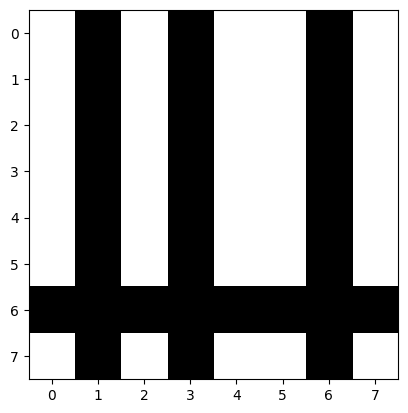

In [67]:
show_image(X[2])

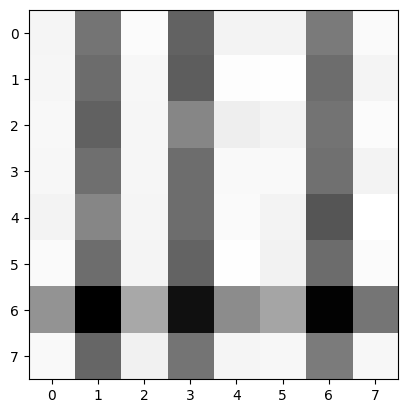

In [68]:
show_image(R[2])

In [69]:
print(X[2]-R[2])

[ -15.3775224    25.72470995    3.41601512    0.337928    -23.12963077
  -22.81417223   34.11022853   -0.91678229  -13.90312073   13.19632995
  -11.79843444   -7.25921232    8.54898584   13.43039312   14.60346516
  -18.62654802   -5.17348902   -1.58078796  -12.82625991   51.03147743
  -37.76561426  -22.80345976   24.63924688    4.49644873   -8.8964454
   18.03829452  -14.2470803    15.15426237   -2.65114104   -2.72715165
   19.24694334  -22.57867694  -22.39960168   50.44207048  -16.6885053
   15.24395415    0.42952965  -21.99949246  -21.04618268   15.56557189
   -1.10654233   14.43175045  -18.66706635    1.74296641   11.9469879
  -27.22329724   13.30245784    4.12499318   69.16937075 -124.43623124
   97.36748084 -102.6791709    59.66648741   92.55577532 -120.56199242
   28.02148657   -3.17300007    5.9610399   -27.7186779    26.75654777
  -17.2379678    -8.71768891   35.84359808  -10.13435223]


In [70]:
print(X-R)

[[-14.2279642  -26.68762117  27.90682246 ... -63.42841254  -5.52720278
    8.61990299]
 [ 11.22645731  21.00203401  -0.72591336 ... -16.4213566  -18.03102606
  -15.37679527]
 [-15.3775224   25.72470995   3.41601512 ...  -8.71768891  35.84359808
  -10.13435223]
 ...
 [-13.92031416  29.80531808  30.84763518 ...  -5.16332183 -30.57494064
  -22.69082619]
 [ 51.6432111  -30.53449275 -14.56917    ...   8.9519586   -2.27769532
   15.46035946]
 [ -0.84773899  -4.88797049 -10.87859635 ...  27.36631295 -97.09905935
  -17.14162839]]


In [71]:
np.linalg.norm(X-R)

24790.511503550755

# Individual tasks

**Objective of first task is to leverage noise reduction when working with reduced dimension space.**

**Second task should demonstare usage of dimension reductions techniques for 2D visualization and showing clustering results in that vis.**

---

## Task 1(1p) : Complete following tasks for dimension reduction using SVD over our toy datasets (bars, bars_noise20, bars_noise50)

Load all sets

In [72]:
U, s, V_T = np.linalg.svd(X, full_matrices=True)
U_noi_20, s_noi_20, V_T_noi_20 = np.linalg.svd(X_noise_20, full_matrices=True)
U_noi_50, s_noi_50, V_T_noi_50 = np.linalg.svd(X_noise_50, full_matrices=True)
dimensions= [8,12,16,20,24,28,32,36,40,44,48,52]

Norm: 73141.35383274333, dimension: 8


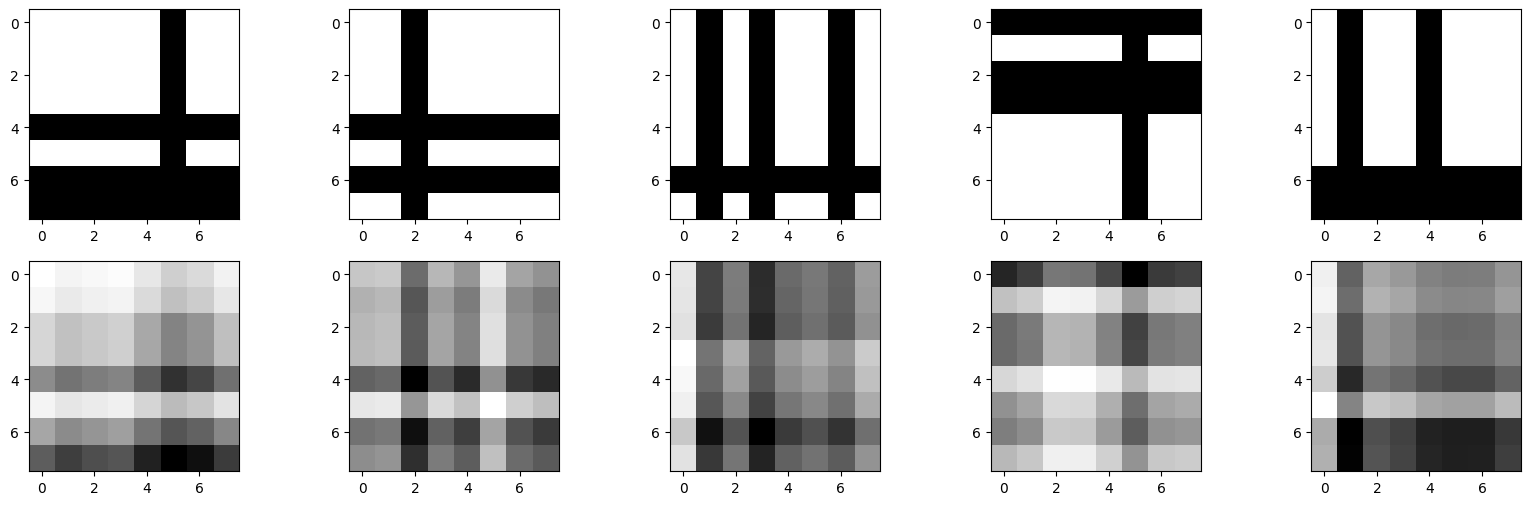

Norm: 53064.40722670531, dimension: 12


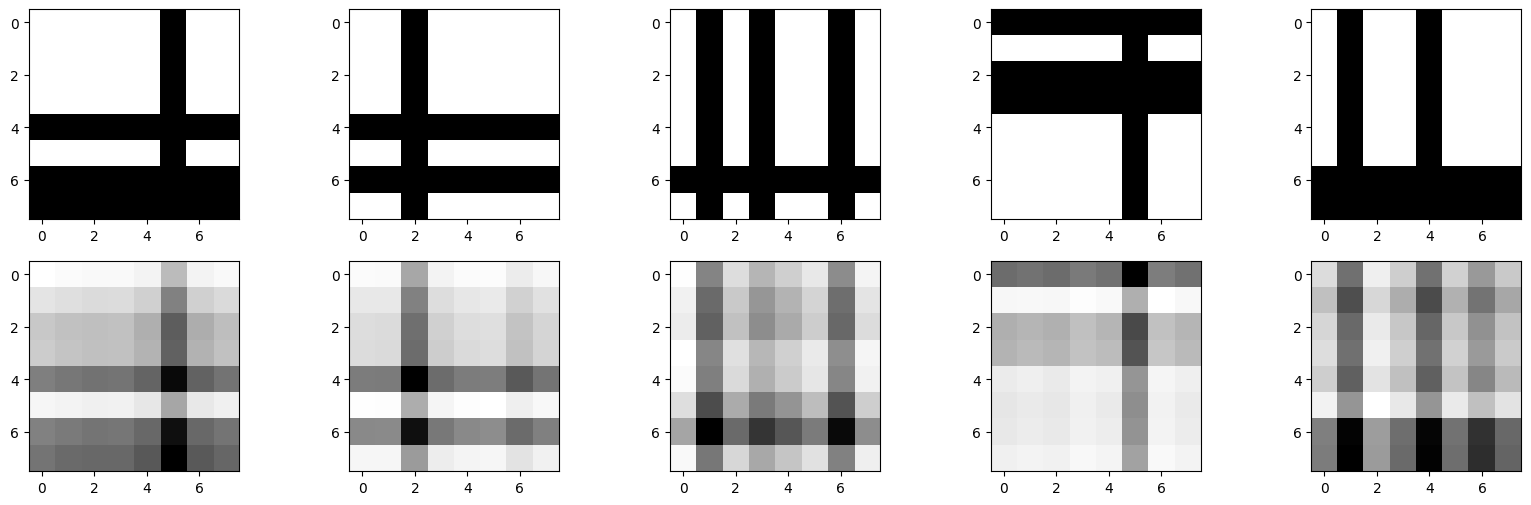

Norm: 30981.92562954615, dimension: 16


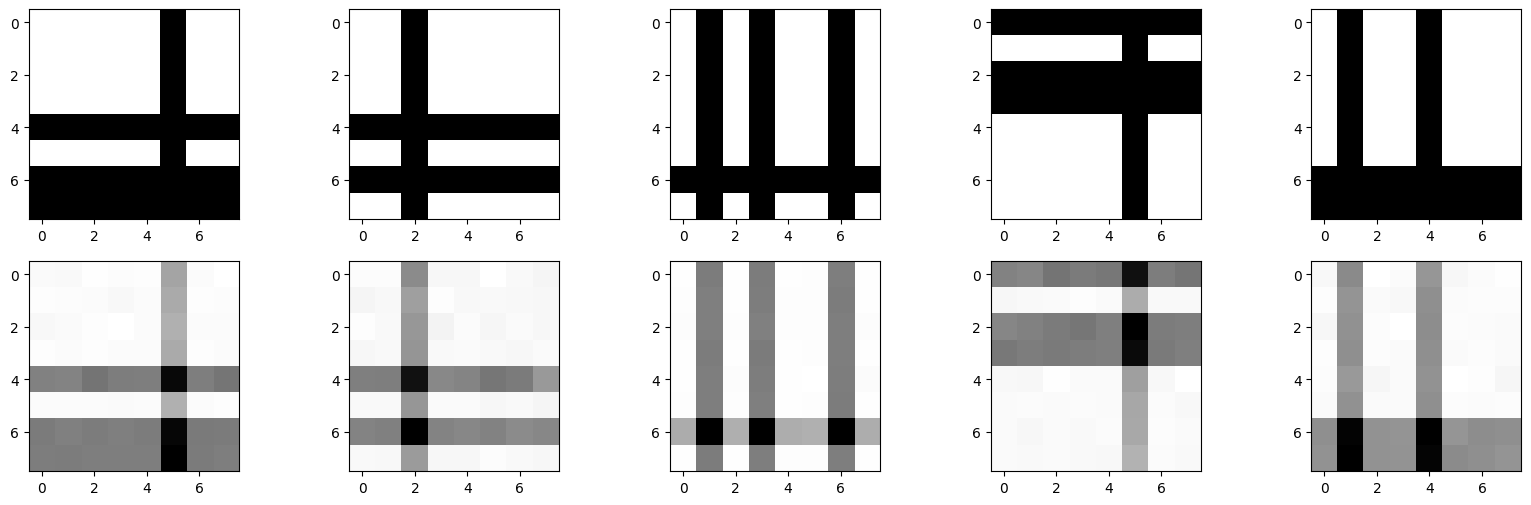

Norm: 29502.374166921963, dimension: 20


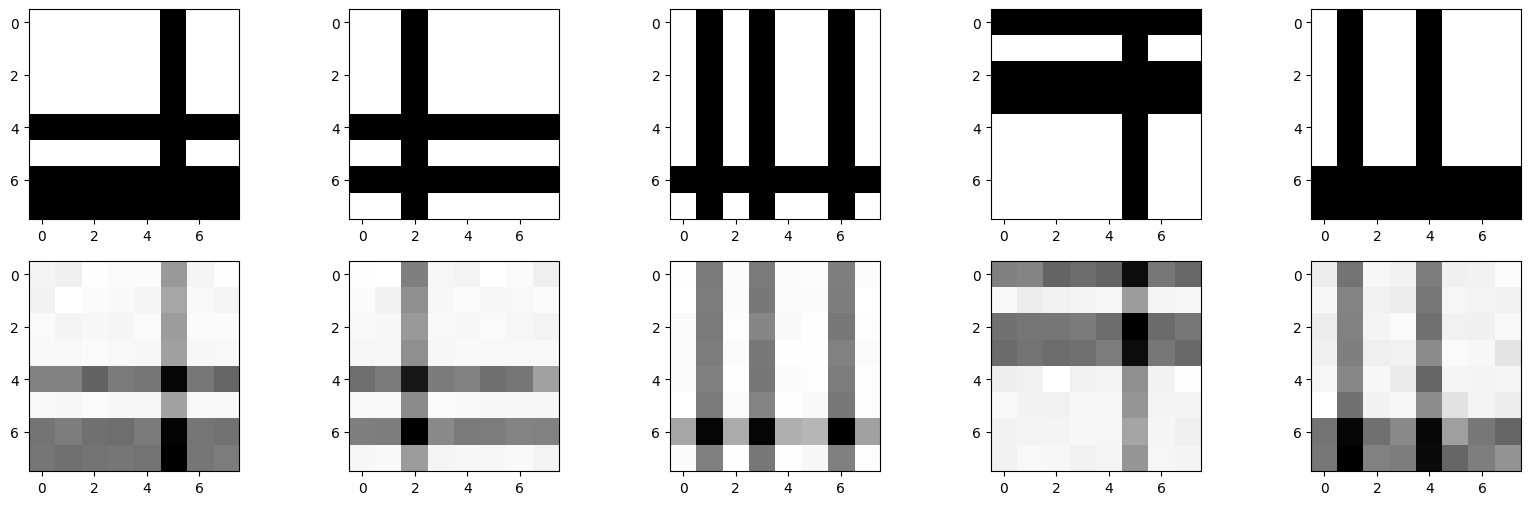

Norm: 27992.910730293323, dimension: 24


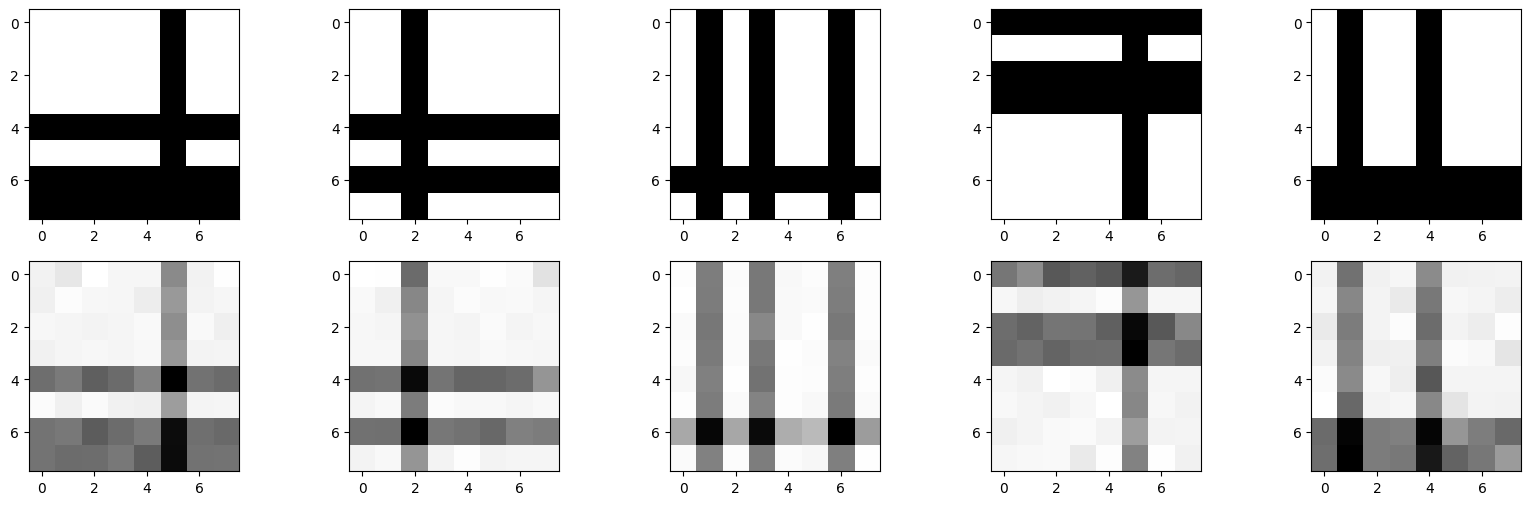

Norm: 26429.01617252409, dimension: 28


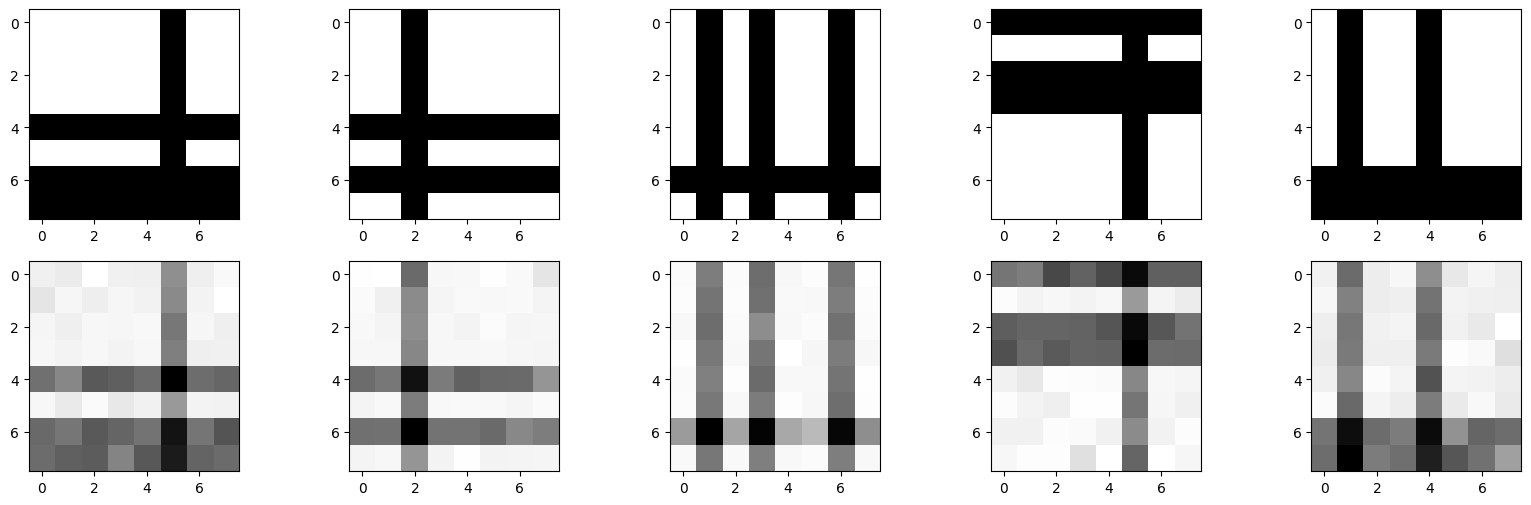

Norm: 24790.511503550755, dimension: 32


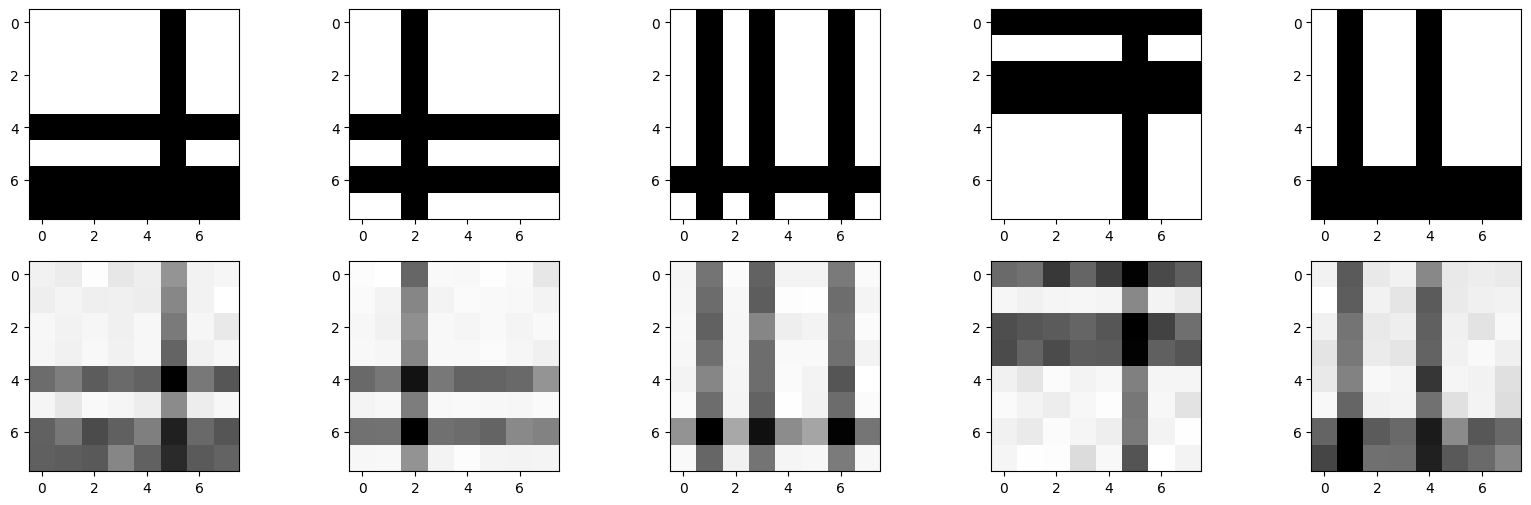

Norm: 23082.130804626508, dimension: 36


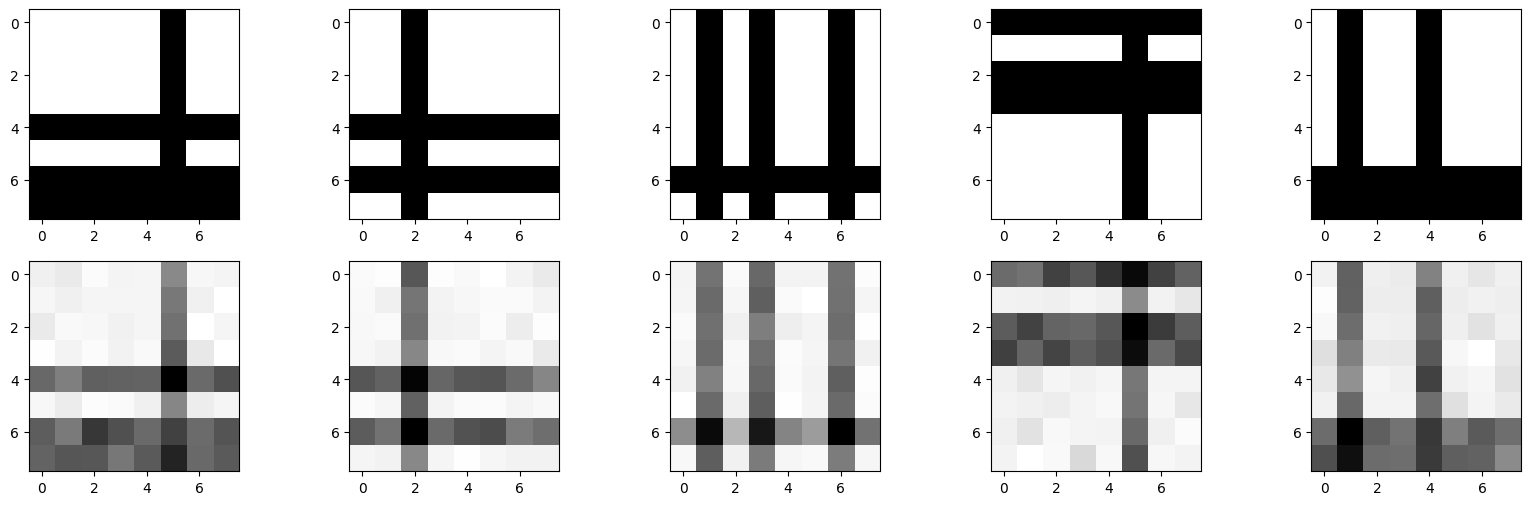

Norm: 21270.305204525106, dimension: 40


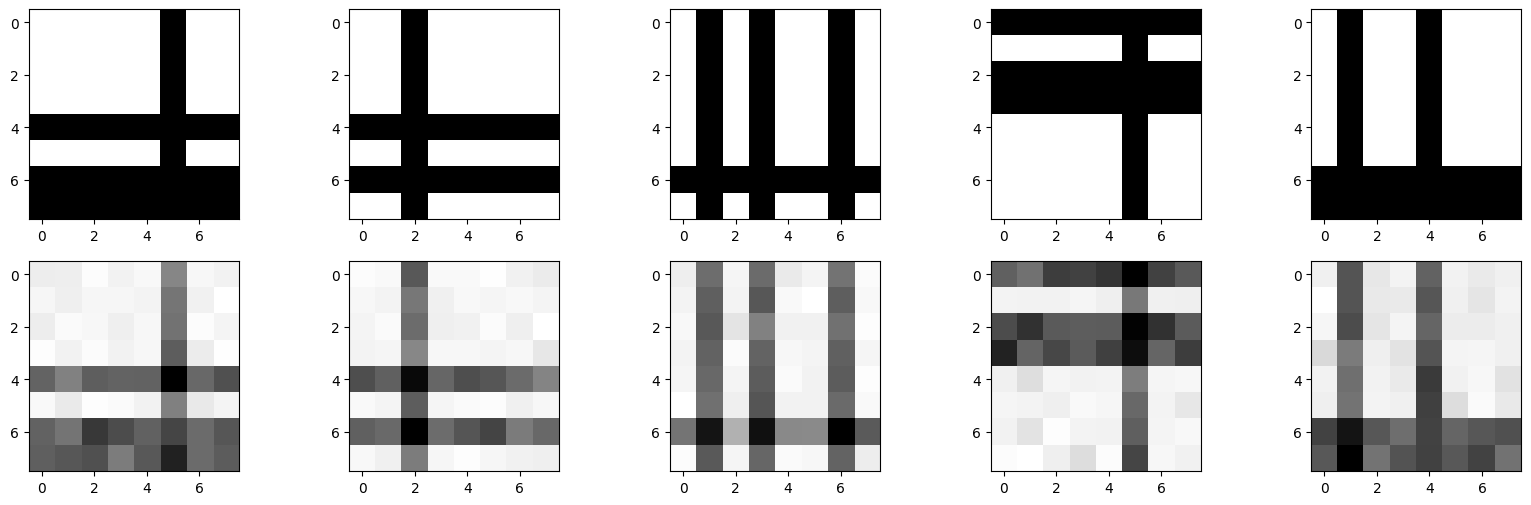

Norm: 19320.145386230775, dimension: 44


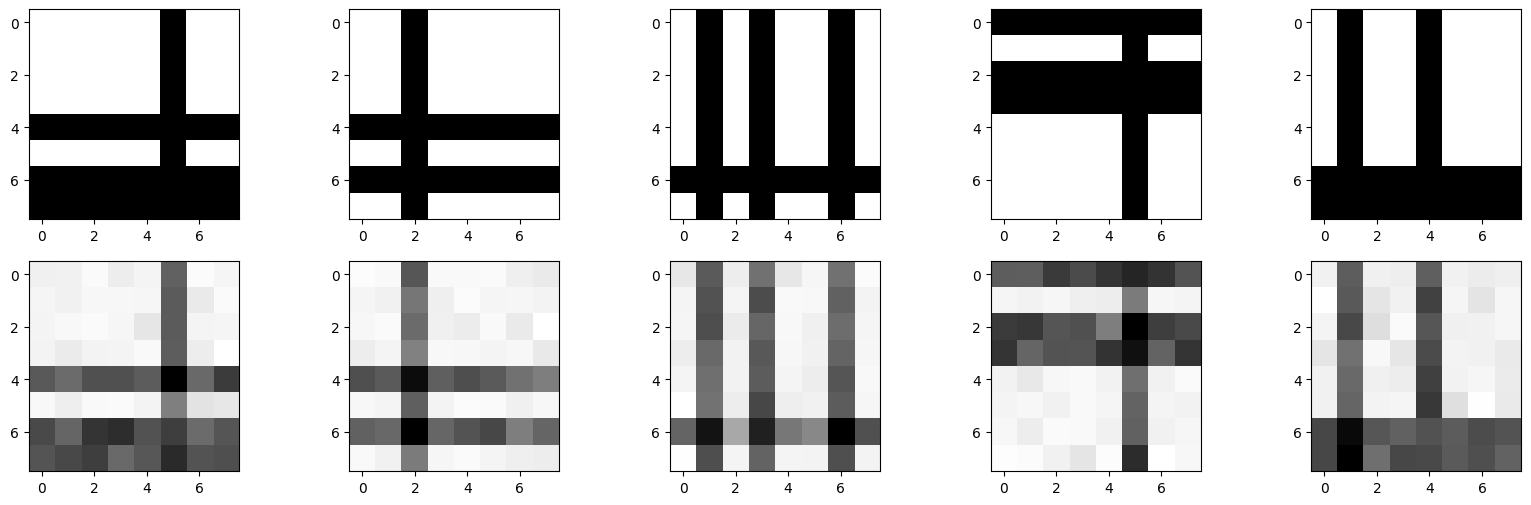

Norm: 17184.931273539525, dimension: 48


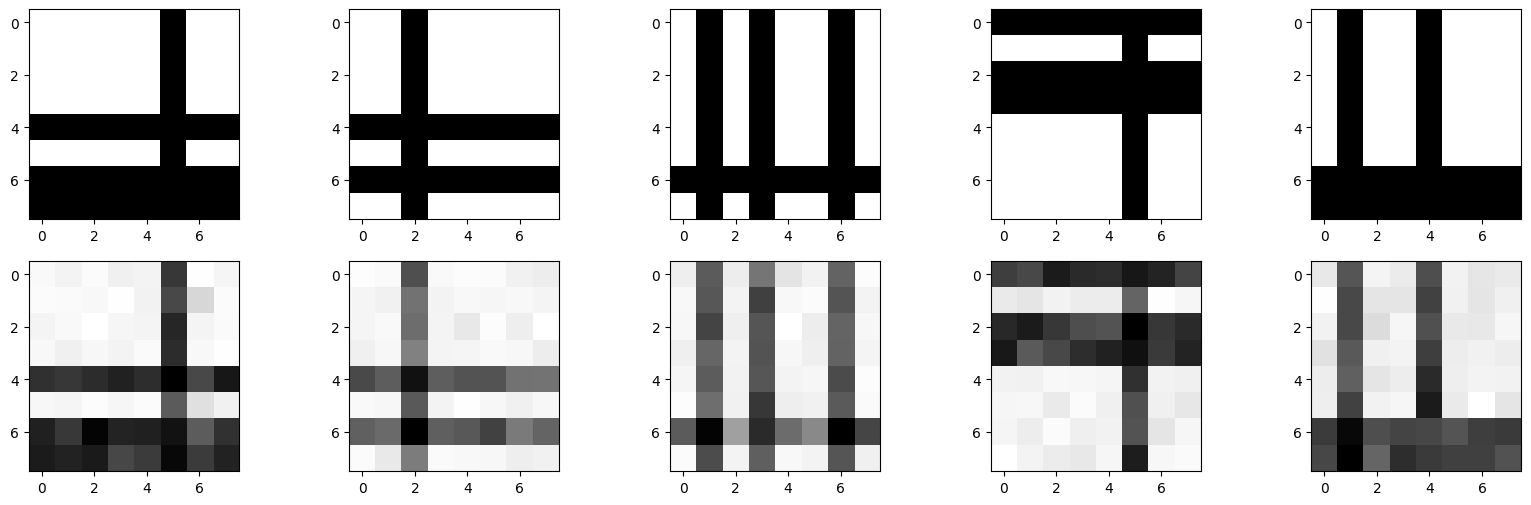

Norm: 14799.494496923742, dimension: 52


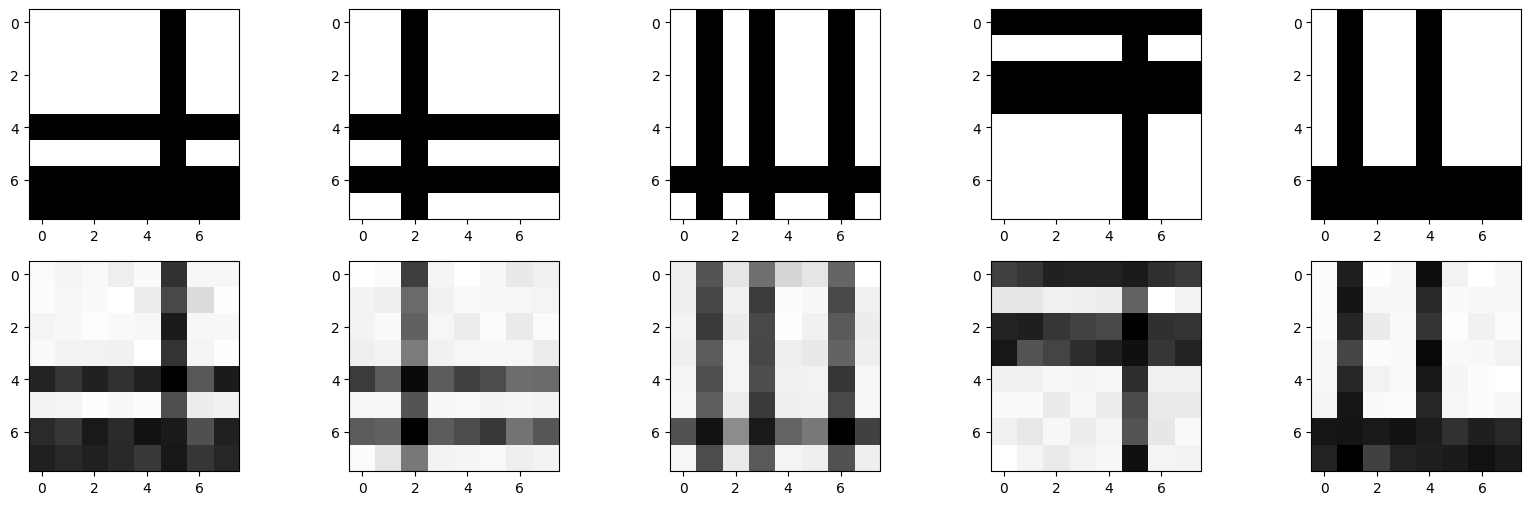

In [73]:
norm_X = []
for dimen in dimensions:
  R = U[:,:dimen].dot(np.diag(s[:dimen])).dot(V_T[:dimen, :])
  norm = np.linalg.norm(X-R)
  norm_X.append(norm)
  figure, axis = plt.subplots(2, 5, figsize=(20,6))
  print('Norm: {0}, dimension: {1}'.format(norm, dimen))

  for img in range(5):
    axis[0,img].imshow(X[img].reshape((8,8)), cmap='Greys')
    axis[1,img].imshow(R[img].reshape((8,8)), cmap='Greys')
  plt.show()

Norm: 111682.70164989925, dimension: 8


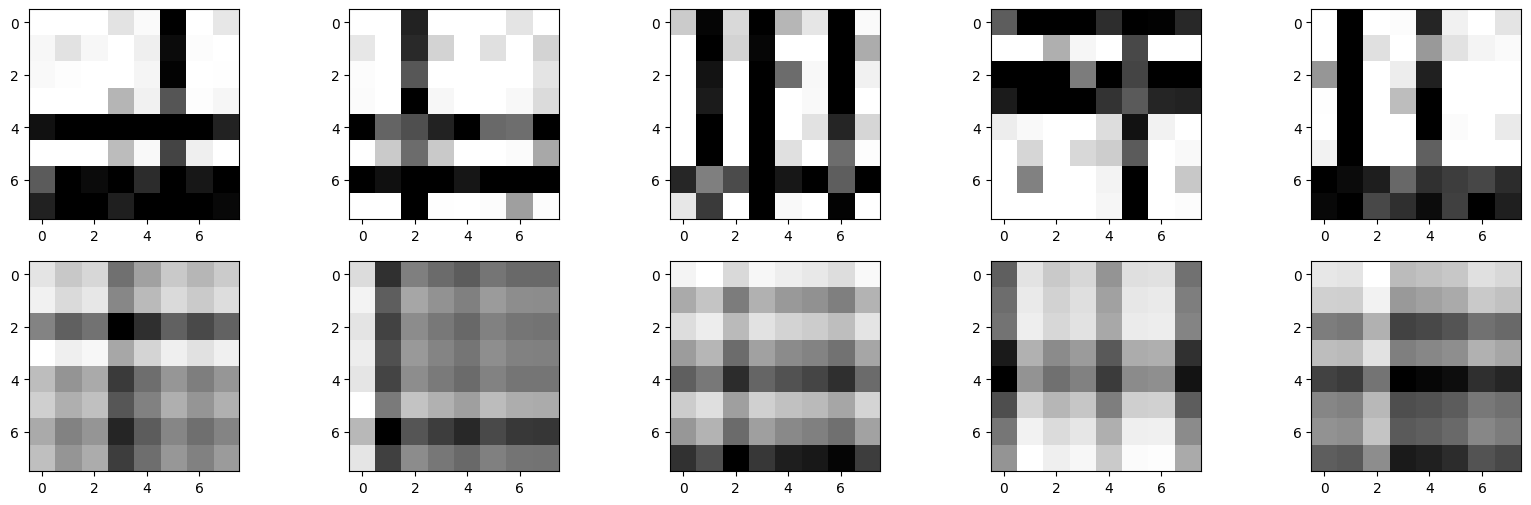

Norm: 129765.08655568102, dimension: 12


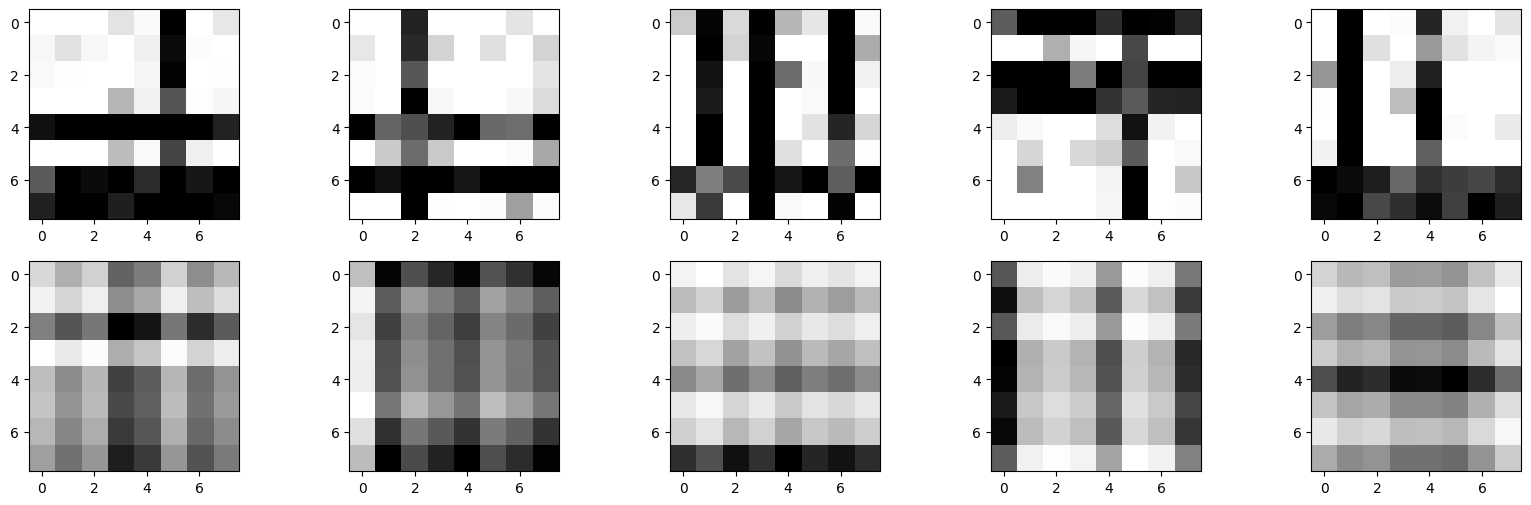

Norm: 125829.78927510964, dimension: 16


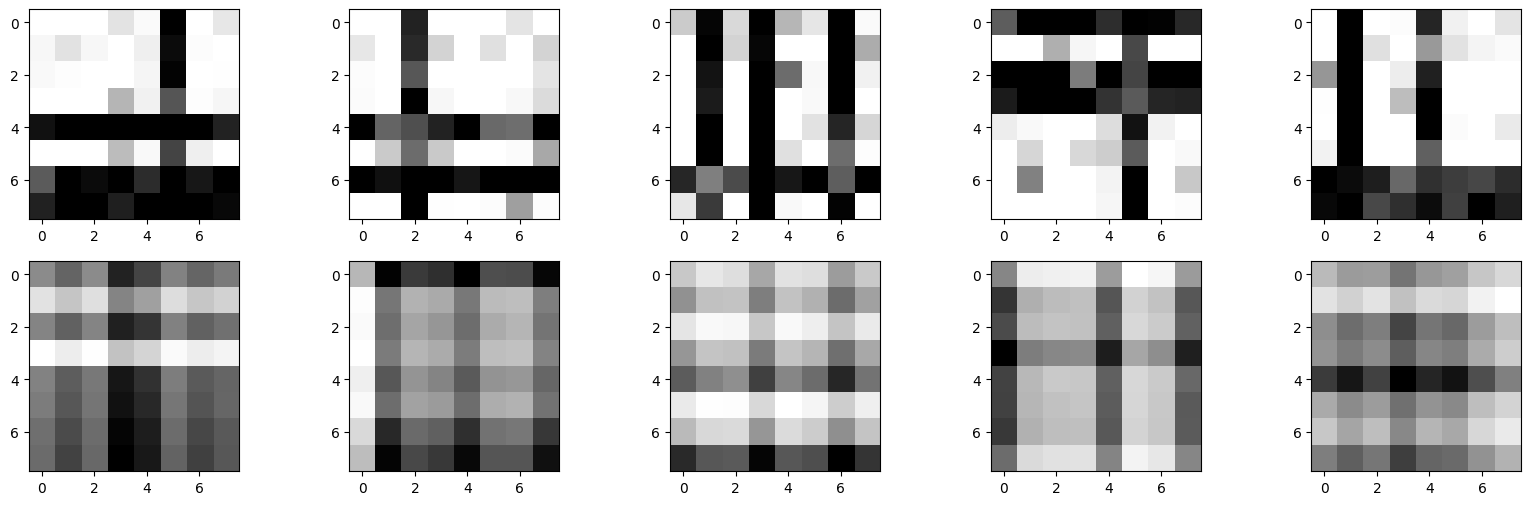

Norm: 126296.38067074145, dimension: 20


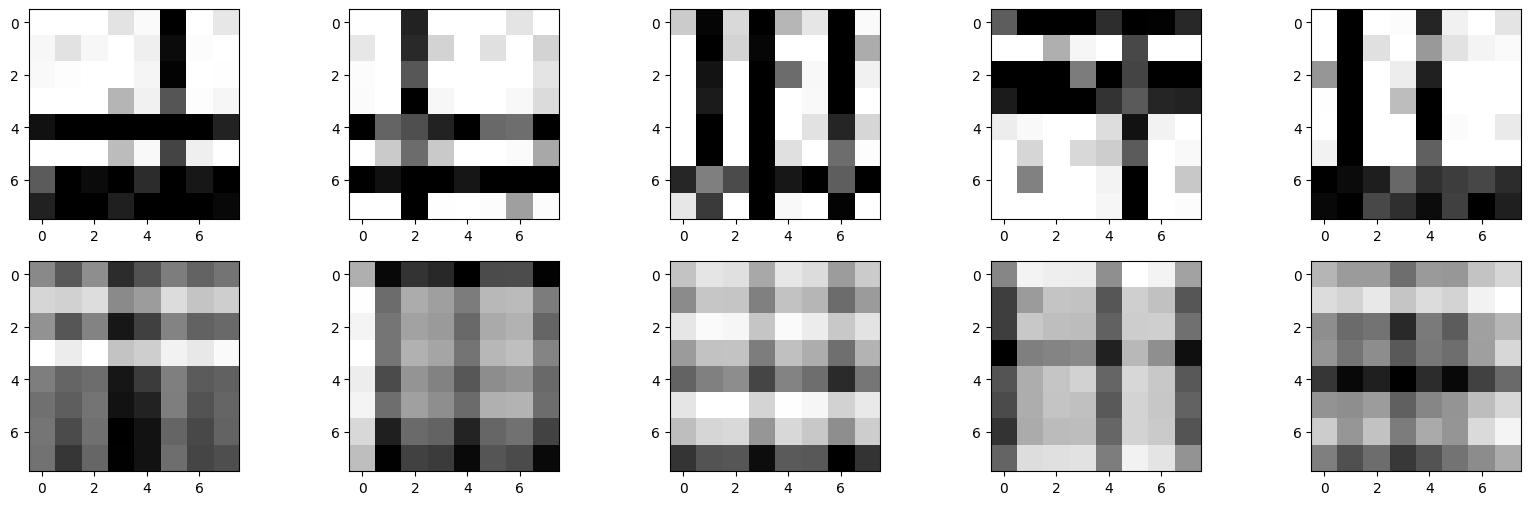

Norm: 126701.74859635586, dimension: 24


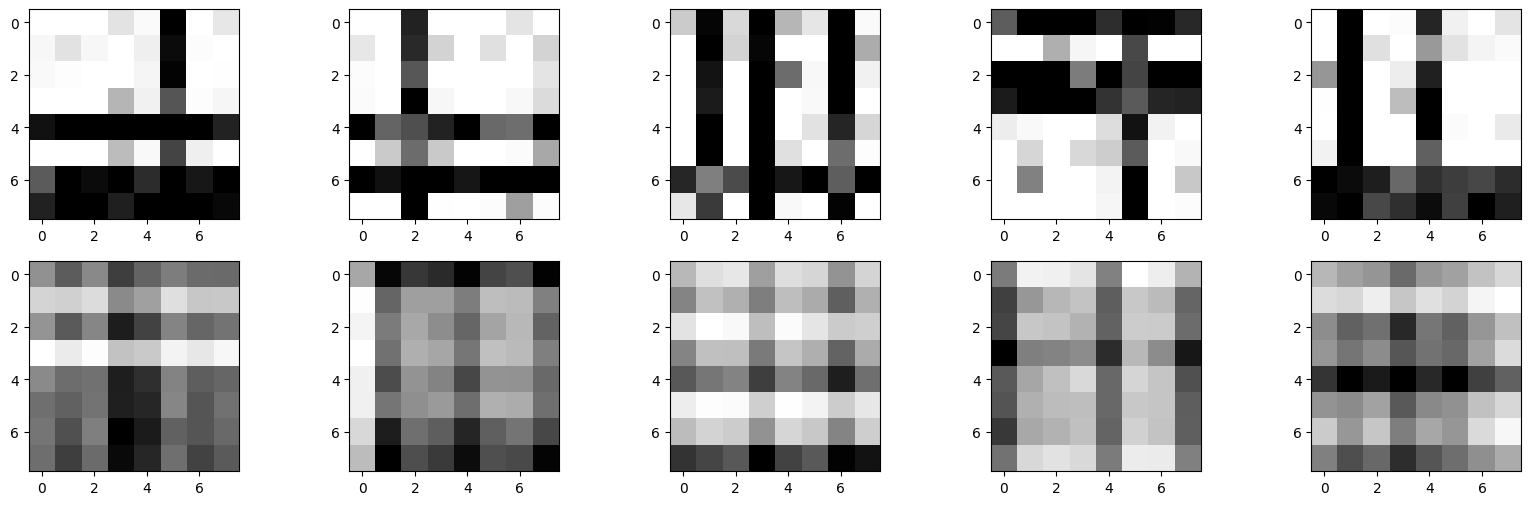

Norm: 127054.82894649878, dimension: 28


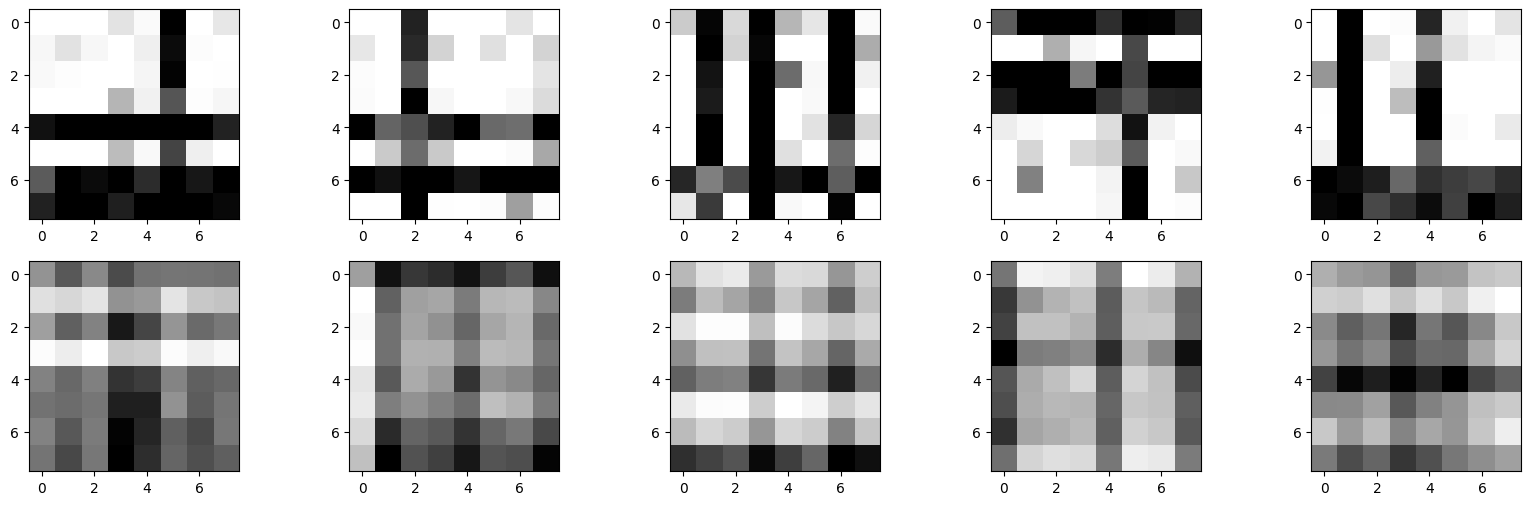

Norm: 127344.34867312659, dimension: 32


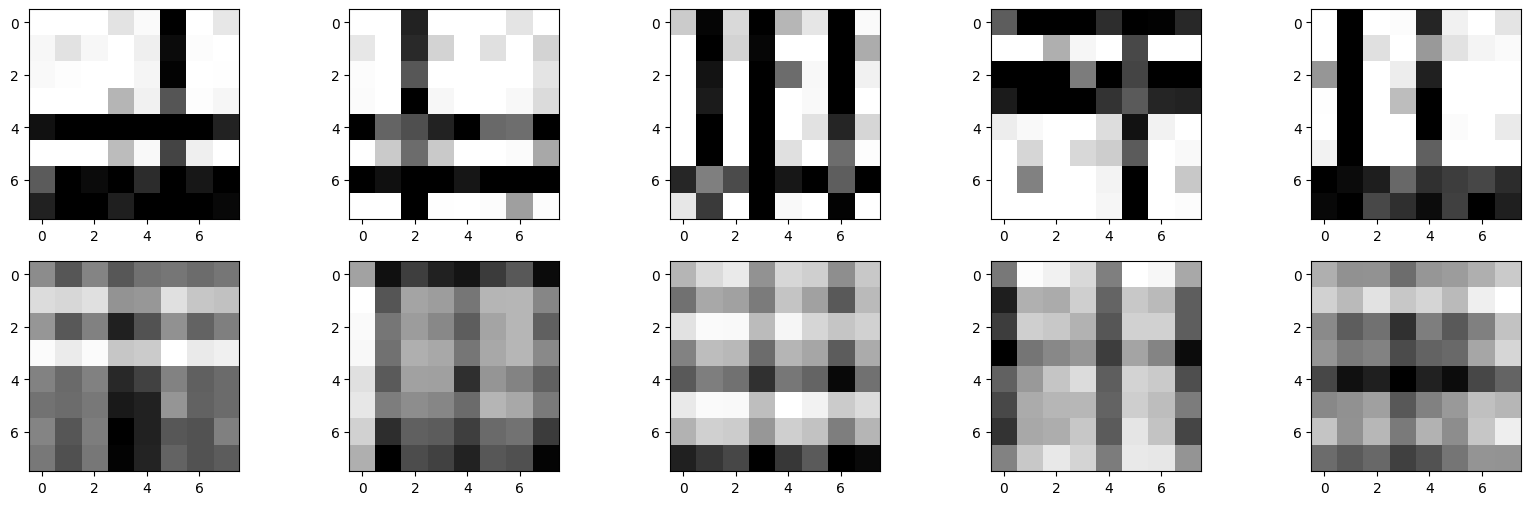

Norm: 127695.60838991635, dimension: 36


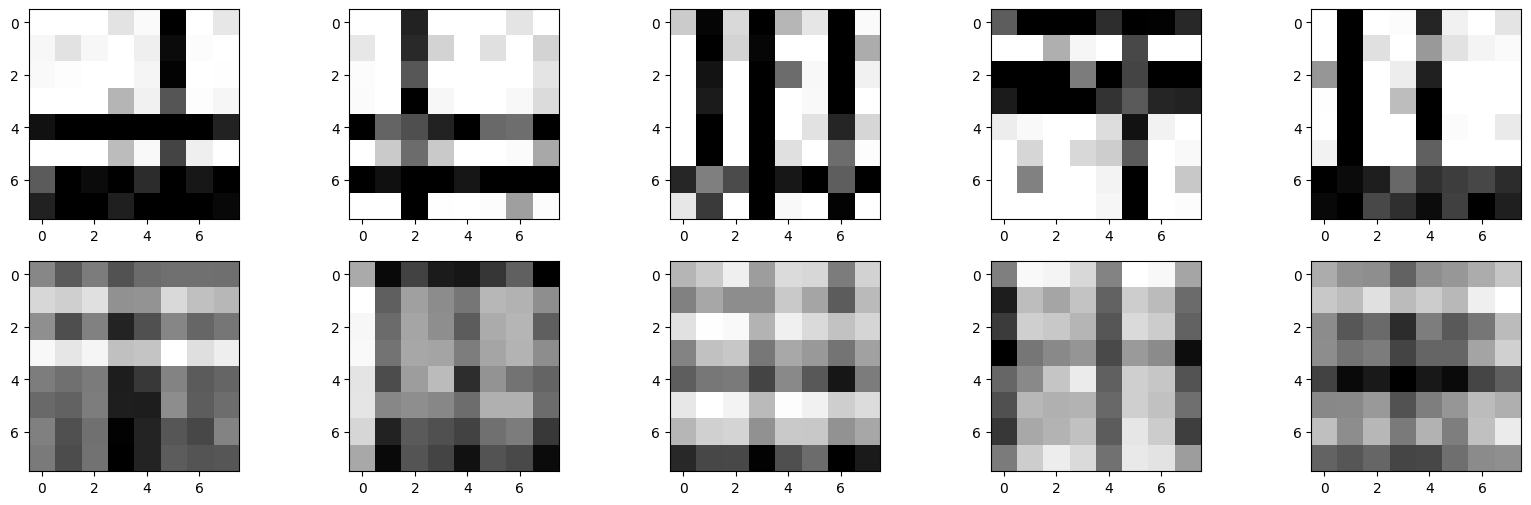

Norm: 127899.05443538599, dimension: 40


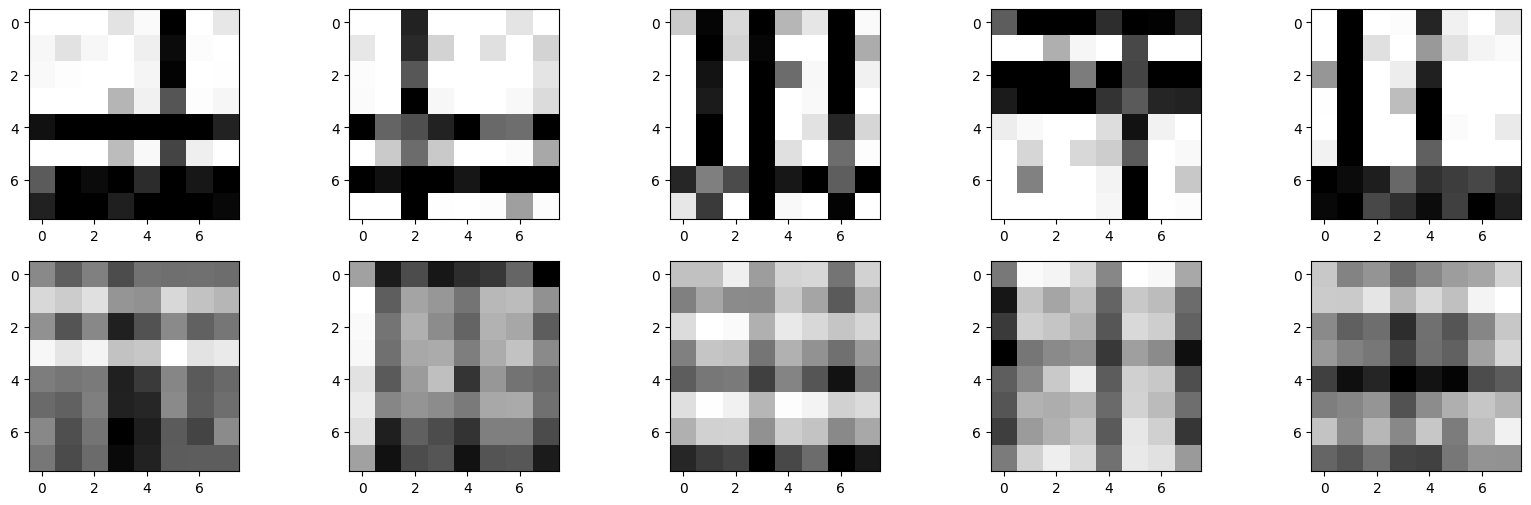

Norm: 128196.76691557863, dimension: 44


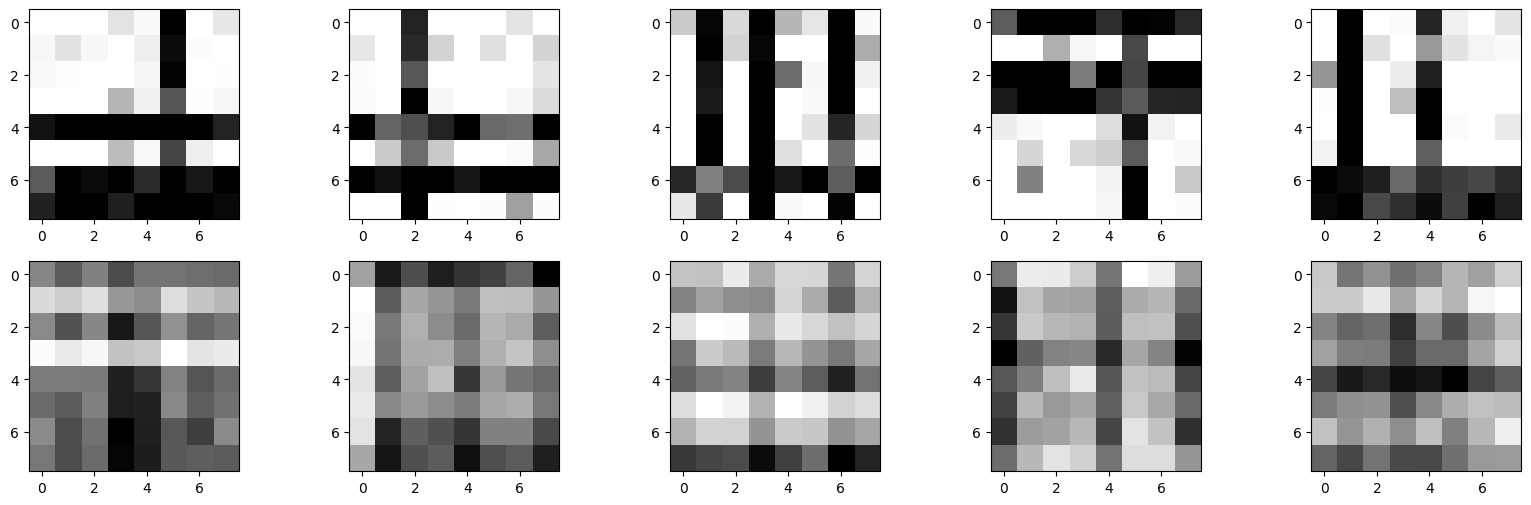

Norm: 128619.47355635853, dimension: 48


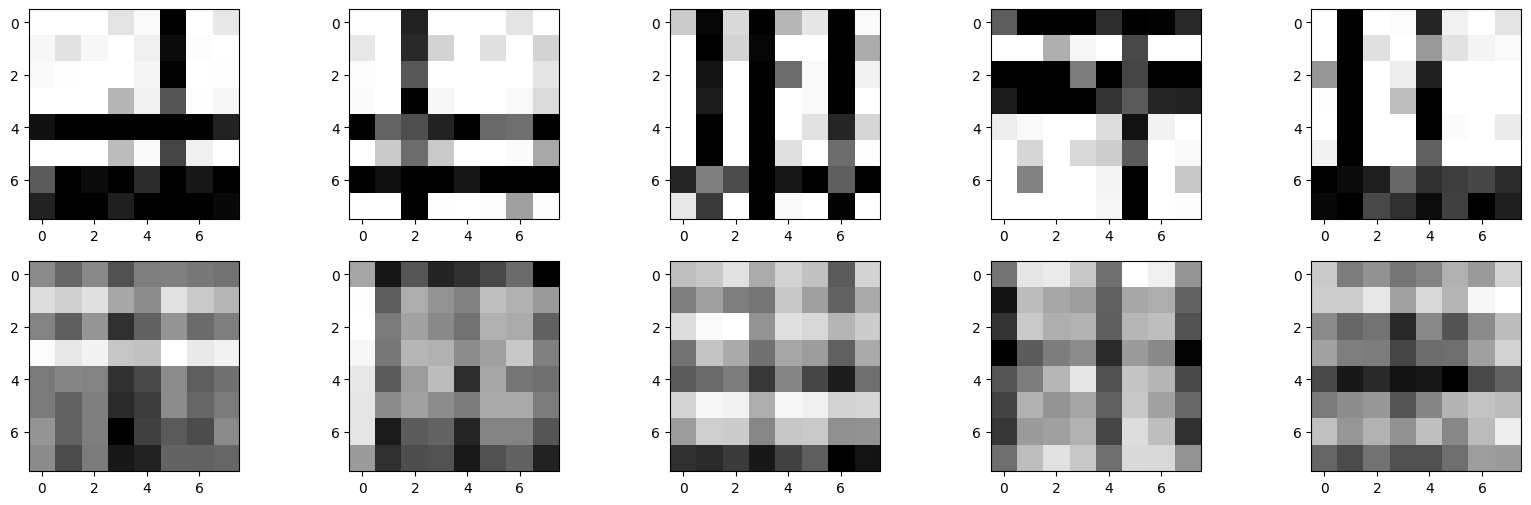

Norm: 128880.12044175187, dimension: 52


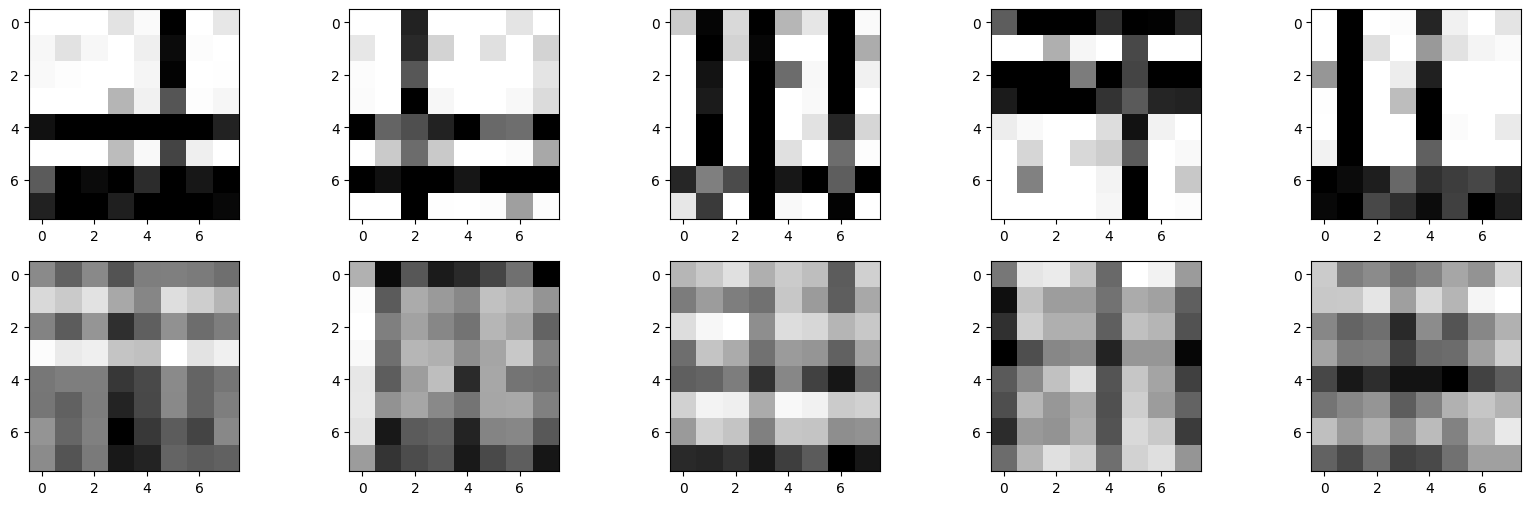

In [74]:
form_20 = []
for dimen in dimensions:
  R_redu_20 = U_noi_20[:,:dimen].dot(np.diag(s[:dimen])).dot(V_T[:dimen, :])
  norm_20 = np.linalg.norm(X_noise_20-R_redu_20)
  form_20.append(norm_20)
  figure, axis = plt.subplots(2, 5, figsize=(20,6))
  print('Norm: {0}, dimension: {1}'.format(norm_20, dimen))
  
  for img in range(5):
    axis[0,img].imshow(X_noise_20[img].reshape((8,8)), cmap='Greys')
    axis[1,img].imshow(R_redu_20[img].reshape((8,8)), cmap='Greys')
  plt.show()

Norm: 101172.16377585118, dimension: 8


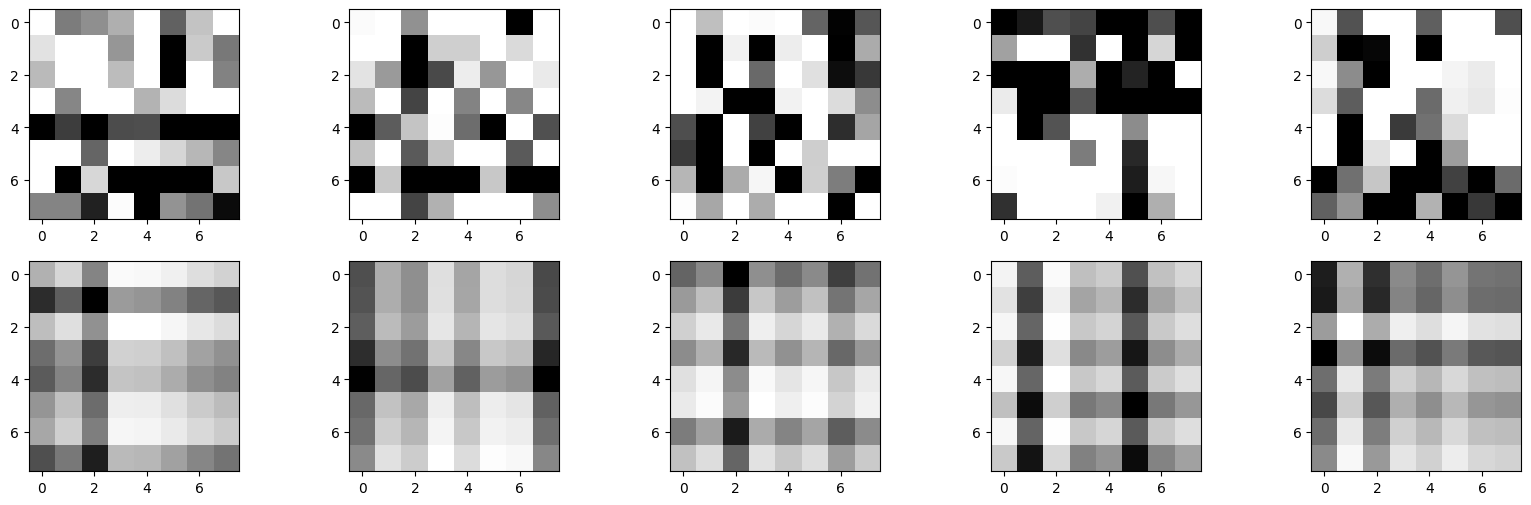

Norm: 115733.13147205423, dimension: 12


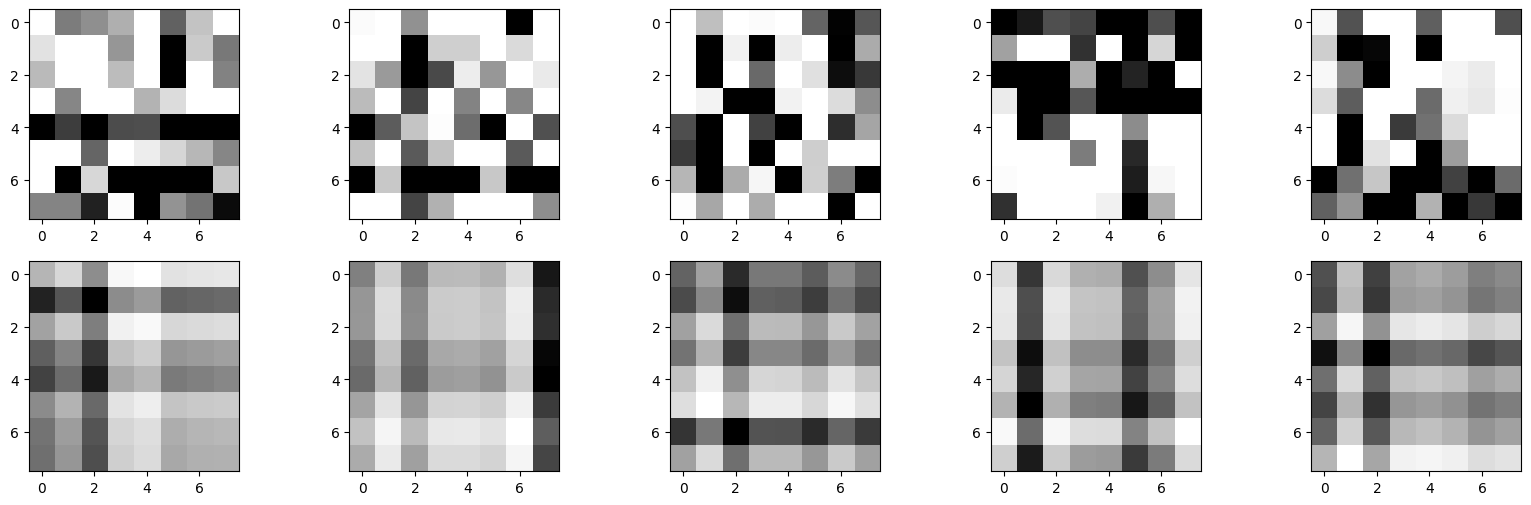

Norm: 126429.46163489325, dimension: 16


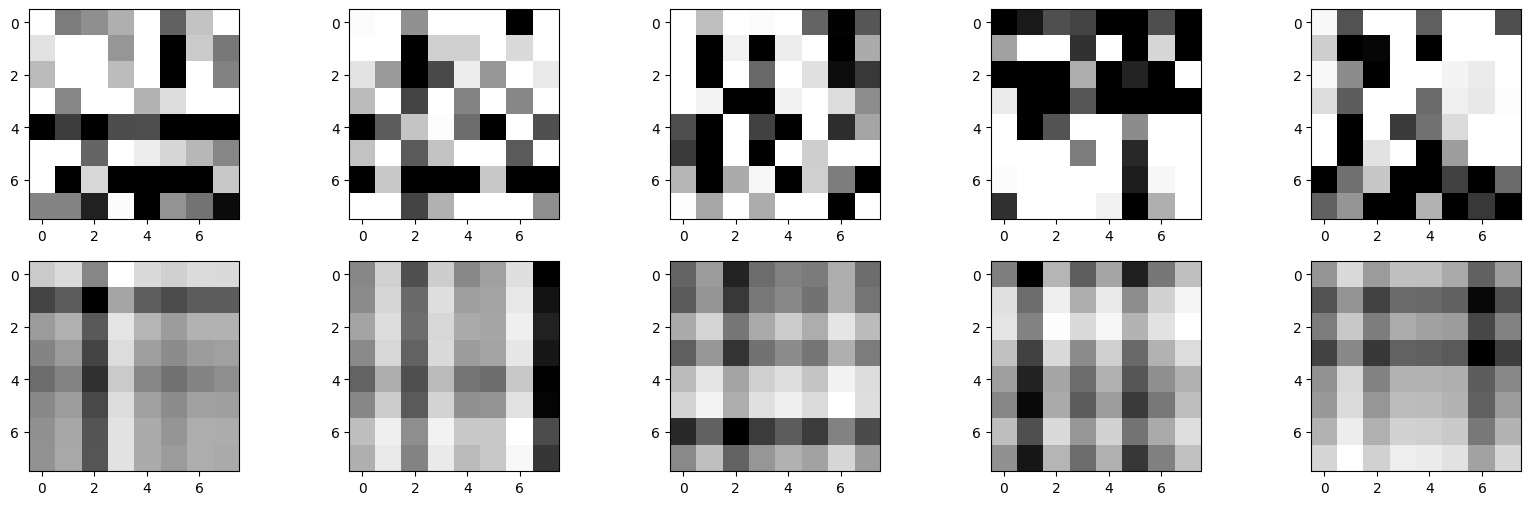

Norm: 126807.7709207575, dimension: 20


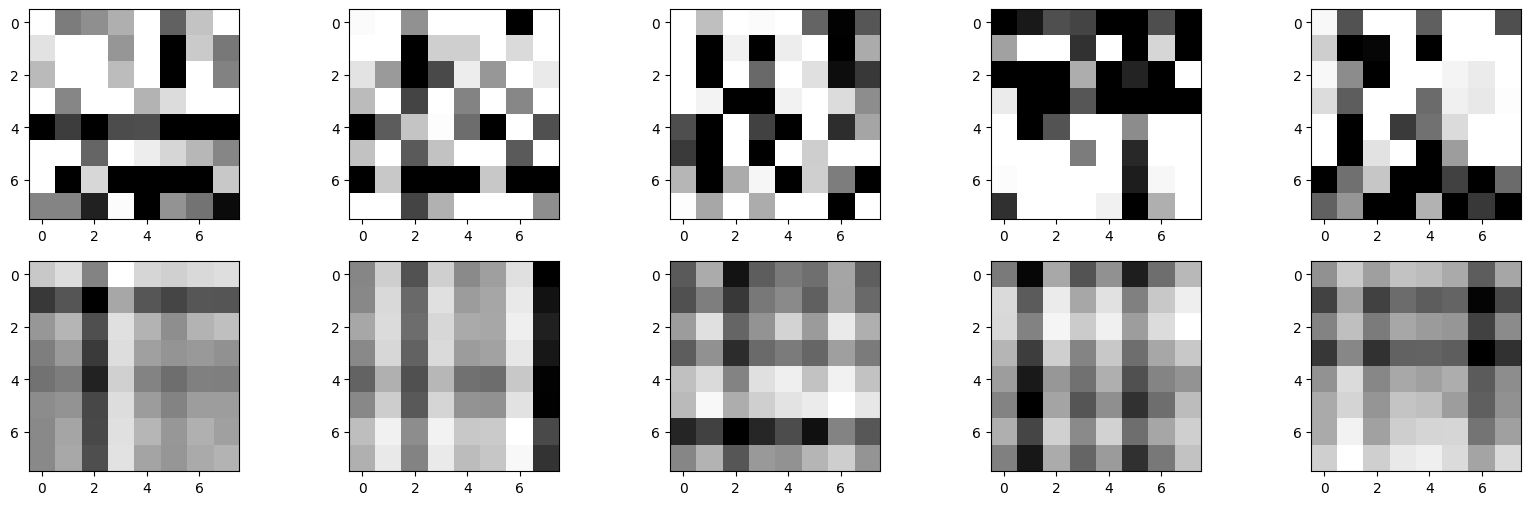

Norm: 127287.5874871521, dimension: 24


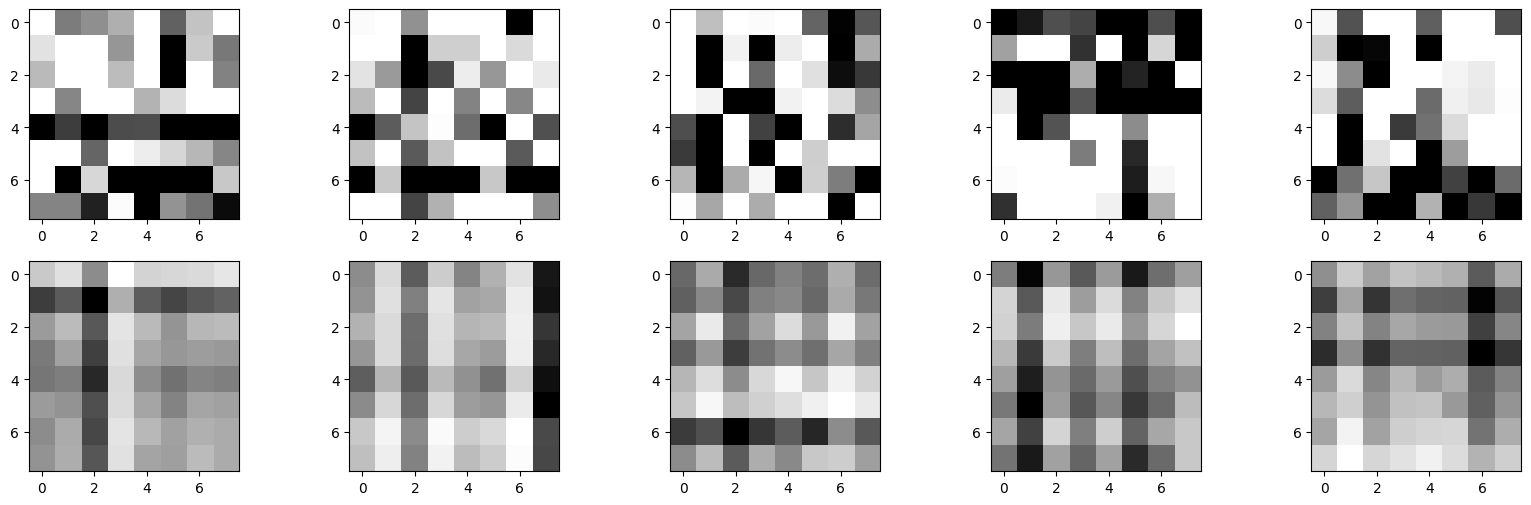

Norm: 127534.70247850775, dimension: 28


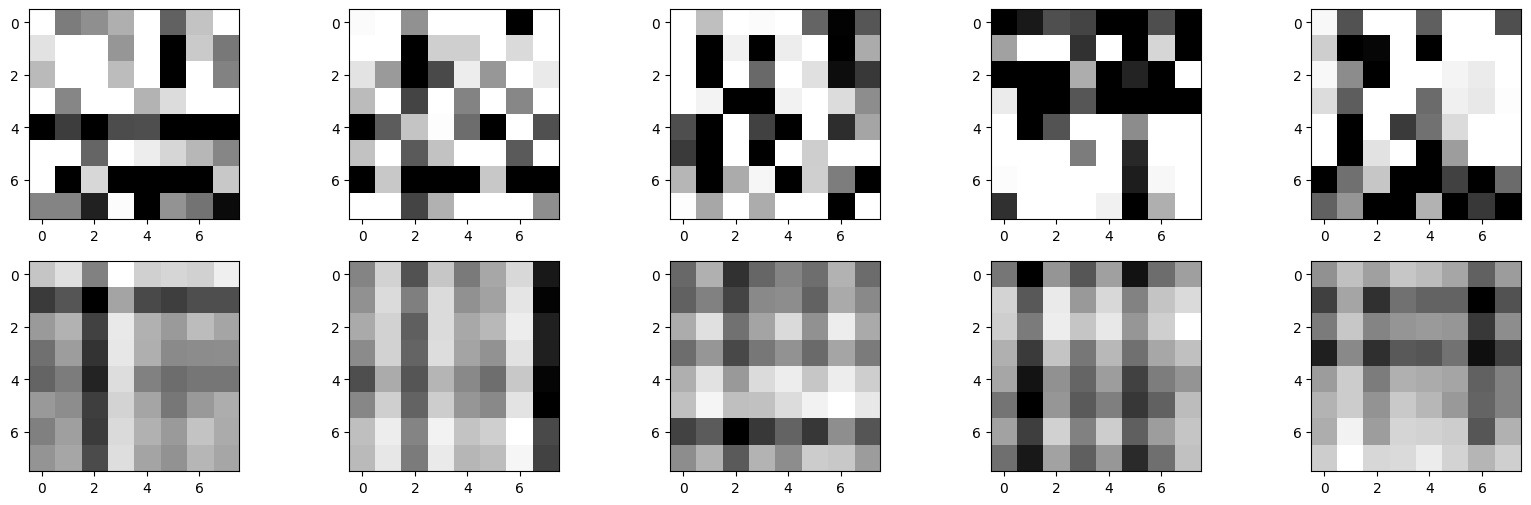

Norm: 127793.14822576831, dimension: 32


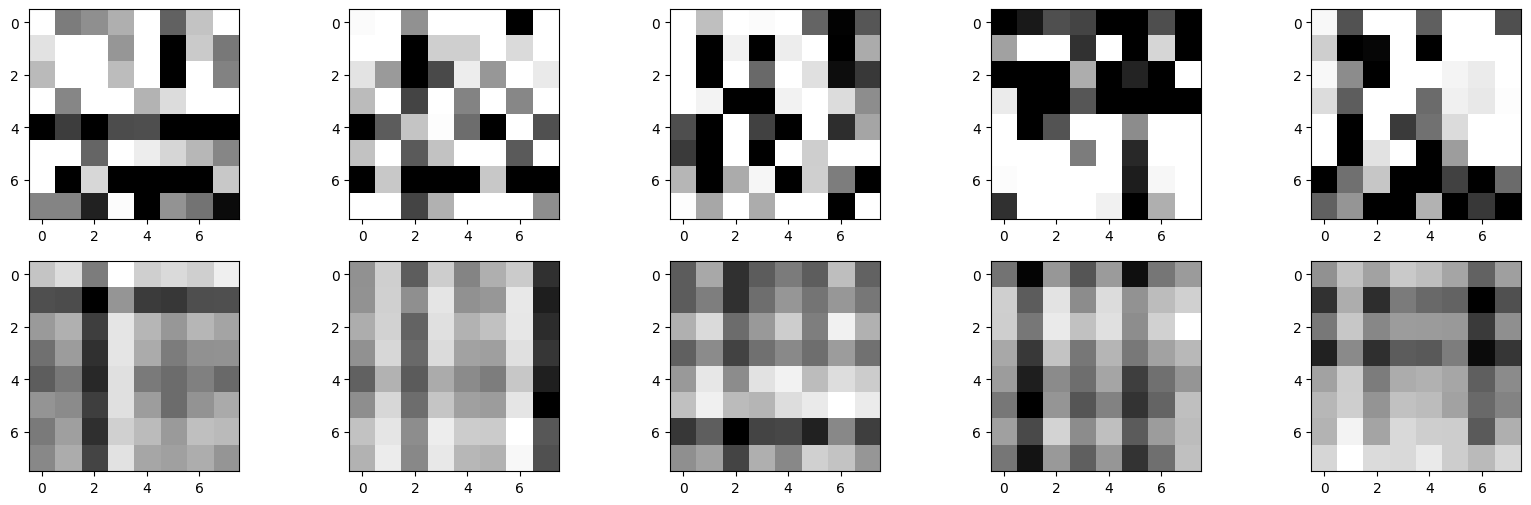

Norm: 128118.19852037902, dimension: 36


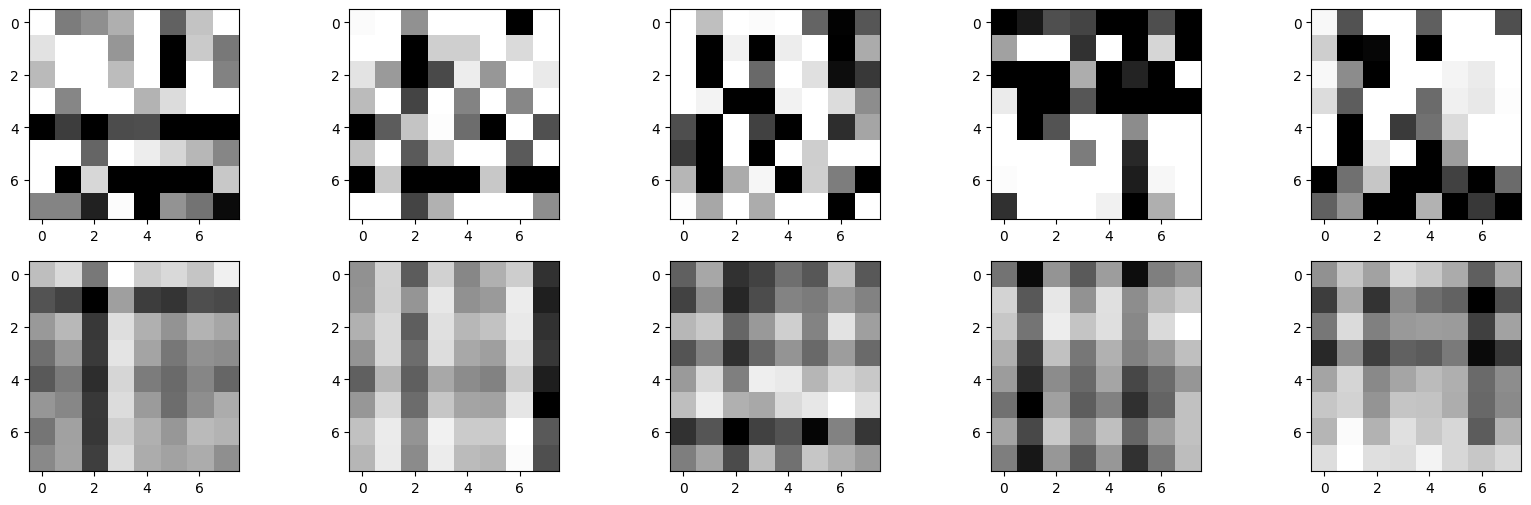

Norm: 128373.16517060006, dimension: 40


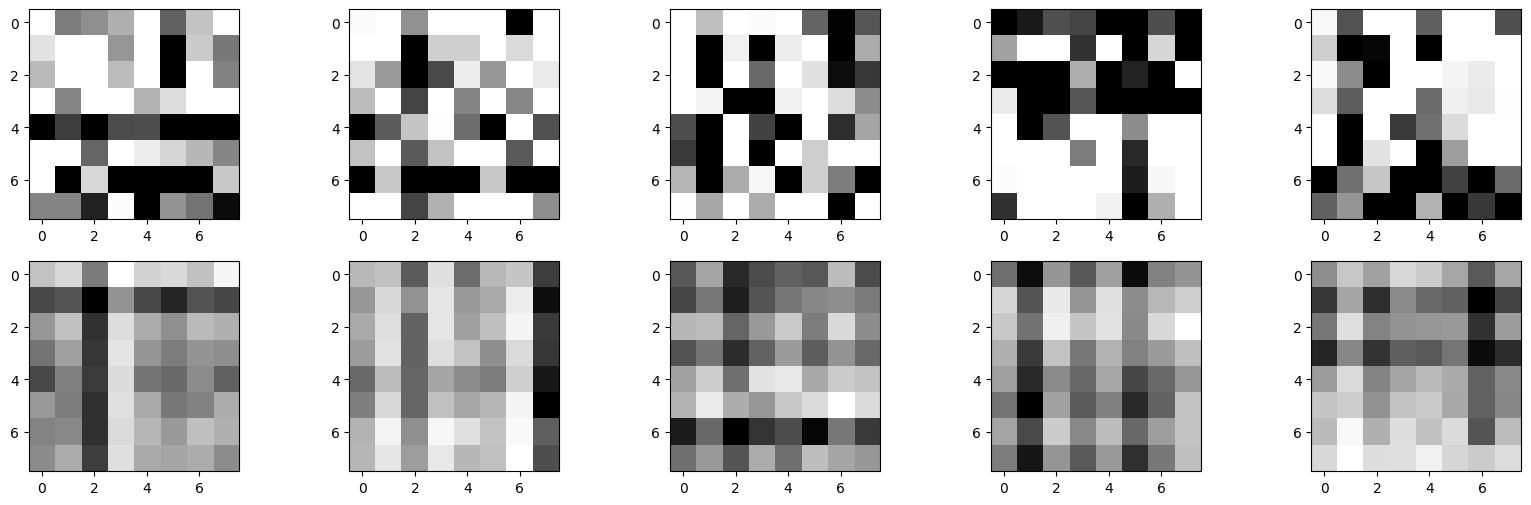

Norm: 128756.99092942143, dimension: 44


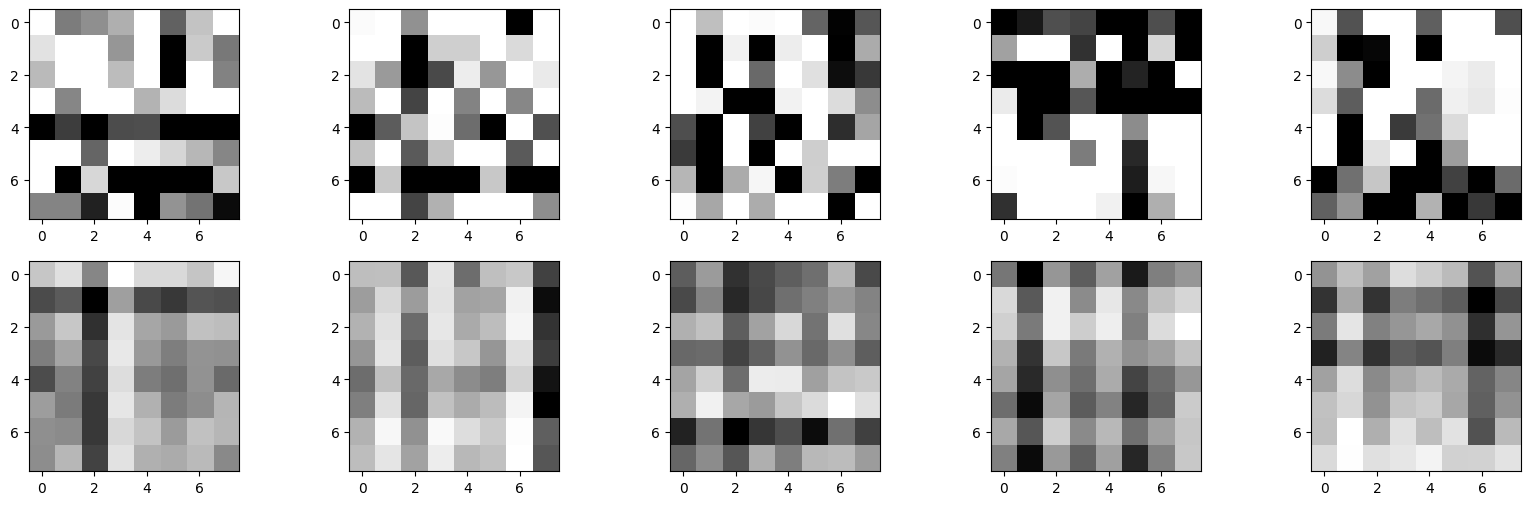

Norm: 128974.58069309719, dimension: 48


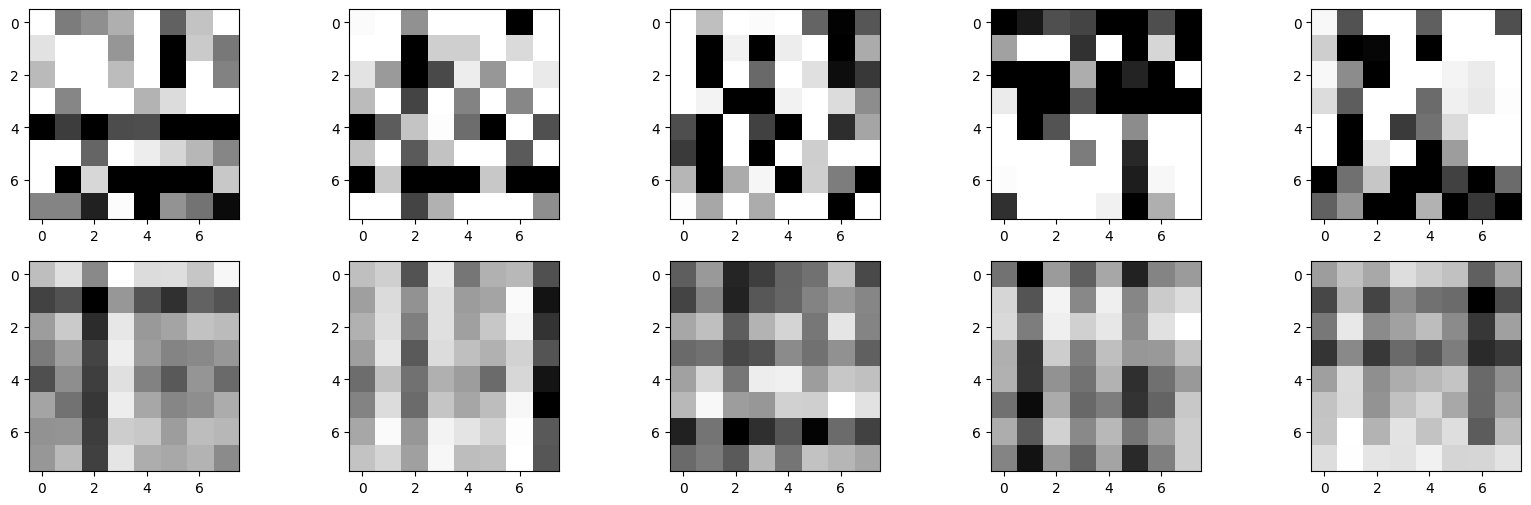

Norm: 129195.26789465292, dimension: 52


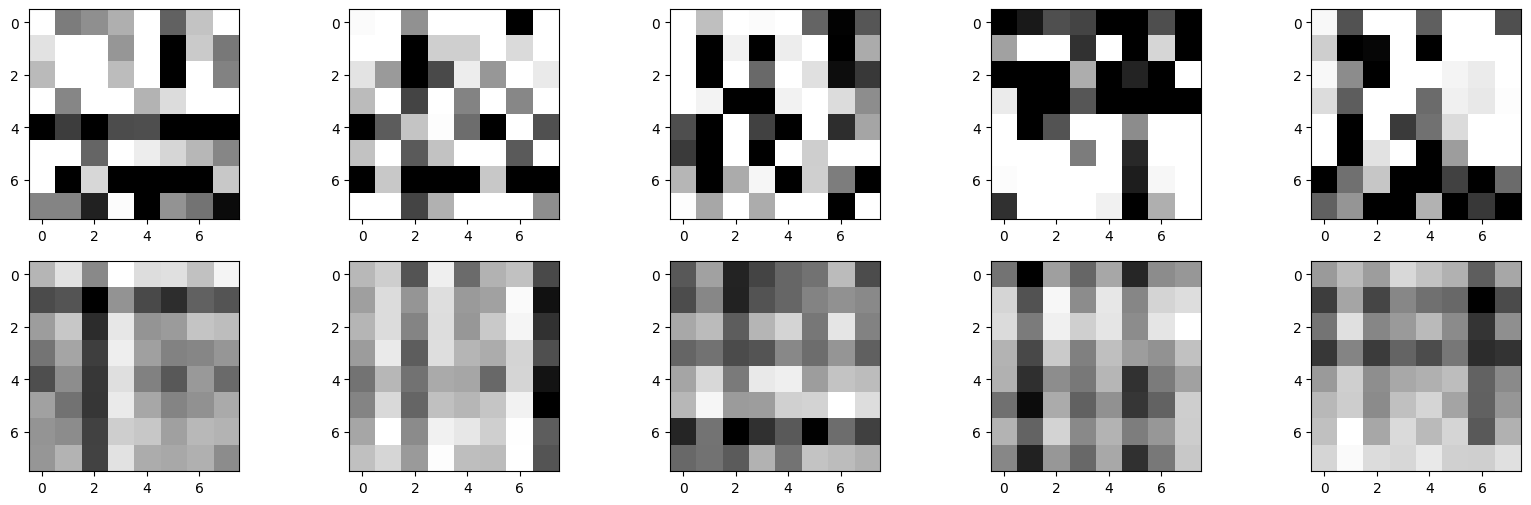

In [75]:
form_50 = []
for dimen in dimensions:
  R_redu_50 = U_noi_50[:,:dimen].dot(np.diag(s[:dimen])).dot(V_T[:dimen, :])
  norm_50 = np.linalg.norm(X_noise_50-R_redu_50)
  form_50.append(norm_50)
  figure, axis = plt.subplots(2, 5, figsize=(20,6))
  print('Norm: {0}, dimension: {1}'.format(norm_50, dimen))
  
  for img in range(5):
    axis[0,img].imshow(X_noise_50[img].reshape((8,8)), cmap='Greys')
    axis[1,img].imshow(R_redu_50[img].reshape((8,8)), cmap='Greys')
  plt.show()

In [76]:
form_50

[101172.16377585118,
 115733.13147205423,
 126429.46163489325,
 126807.7709207575,
 127287.5874871521,
 127534.70247850775,
 127793.14822576831,
 128118.19852037902,
 128373.16517060006,
 128756.99092942143,
 128974.58069309719,
 129195.26789465292]

In [77]:
dimensions

[8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52]

In [78]:
df_x=pd.DataFrame({'form_50':form_50, 'norm_X':norm_X,'form_20':form_20, 'dim':dimensions})

In [79]:
df_x


,form_50,norm_X,form_20,dim
0,101172.163776,73141.353833,111682.701650,8
1,115733.131472,53064.407227,129765.086556,12
2,126429.461635,30981.925630,125829.789275,16
3,126807.770921,29502.374167,126296.380671,20
4,127287.587487,27992.910730,126701.748596,24
5,127534.702479,26429.016173,127054.828946,28
6,127793.148226,24790.511504,127344.348673,32
7,128118.198520,23082.130805,127695.608390,36
8,128373.165171,21270.305205,127899.054435,40
9,128756.990929,19320.145386,128196.766916,44


<AxesSubplot: xlabel='dim', ylabel='norm_X'>

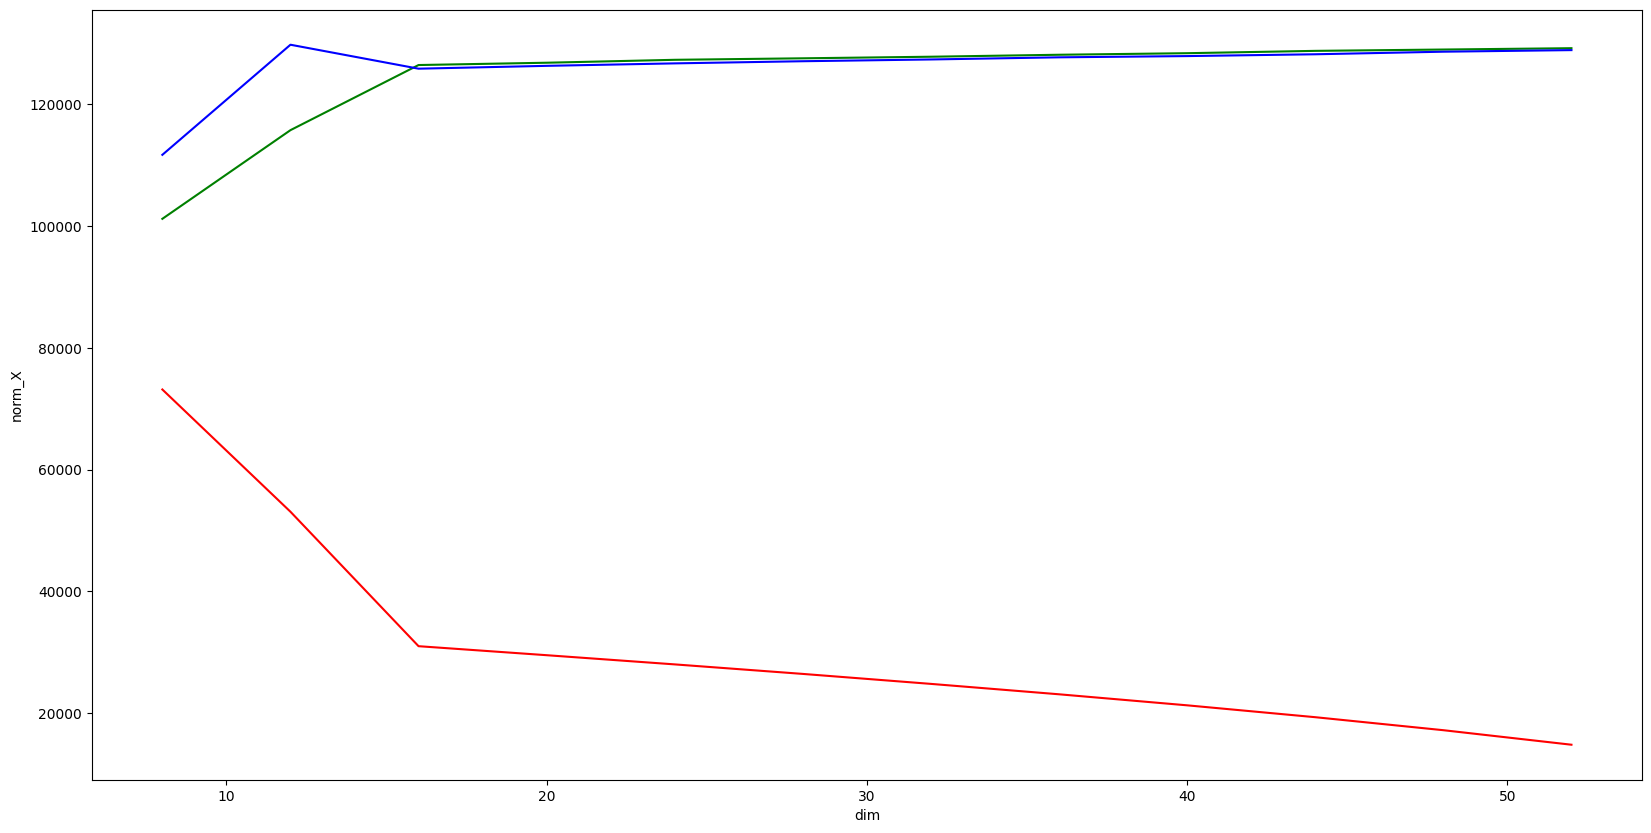

In [80]:
plt.figure(figsize=(20,10))
sns.lineplot(data = df_x,x = 'dim', y= 'norm_X', color='red', legend='full')
sns.lineplot(data = df_x, x = 'dim', y= 'form_50', color='green', legend='full')
sns.lineplot(data = df_x, x = 'dim', y= 'form_20',color='blue', legend='full')

### Qustion: What does the number from previous cell mean? What is the output from *np.linalg.norm* function?

Answer: np.linalg.norm Funkce vrací maticovou nebo vektorovou normu. Druhou otázku moc nechápu (popř. se doptat při opravě)

### Find good number of features/dimension for our toy datasets
- Our datasets **X_noise_20** and **X_noise_50** contain noise, we want to use dimension reduction to eliminate impact of noise in our dataset
- **Try different number of dimensions for dimension reduction, calculate Frobenius norm for reconstructed and original matrix, create plot with results afterwards.**
- Repeat proces for datasets **X**, **X_noise_20**, **X_noise_50**


jak poznam idealni pocet dimenzi - pouziva se elbow metoda. Maximum dimenzi je 64. Nejjednodussi je udelat for, ve kterem se projde vypocet pro dane dimenze a ten vypocet na tu normu. Jestlize bude rozdil dimenzi treba 5%, tak uz to nedava smysl. Vypocitat a vykreslit lineplot potom. Na x budou hodnoty 1 az 64 (dimenze) a na y ta norma.

### Interpret results based on previous graphs. What is the best number of dimensions? Why? What kind of information our toy dataset have?

#### Nejlepší počet dimenzí je 16 (noise_20) a 12? (noise_50) - dle elbow metody výše

### Visualize record *X_noise_50\[2\]* in form of 8x8 image from reconstructed matrix produced for best dimension reduction parameter. Did the use of reduced space helped?

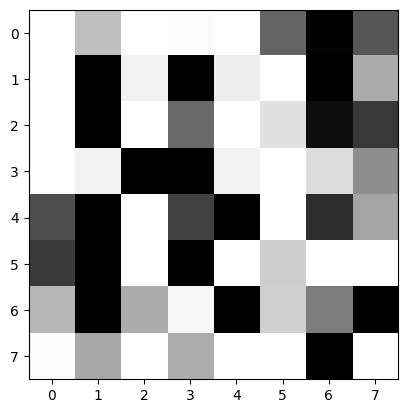

In [81]:
show_image(X_noise_50[2])

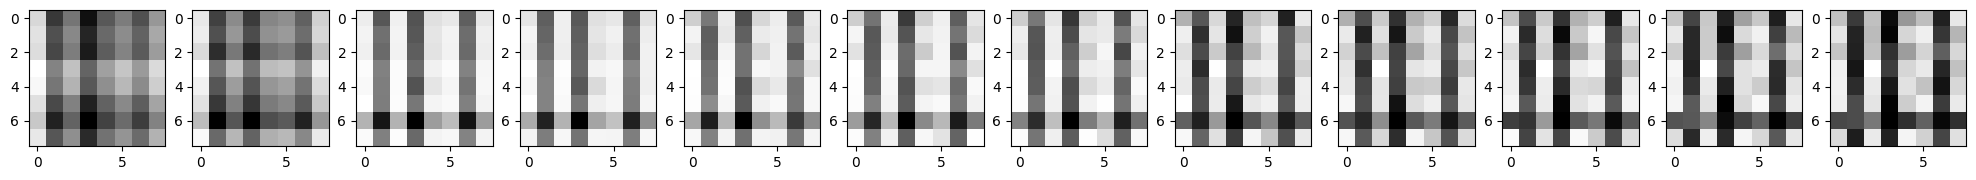

In [82]:
figure, axis = plt.subplots(1, len(dimensions), figsize=(25,15))

for i,dim in enumerate(dimensions):
  R_20 = U_noi_20[:,:dim].dot(np.diag(s_noi_20[:dim])).dot(V_T_noi_20[:dim, :])
  axis[i].imshow(R_20[2].reshape((8,8)), cmap='Greys')

## Matice č. 3, nejlepší výsledek - redukce na 16 dimenzí

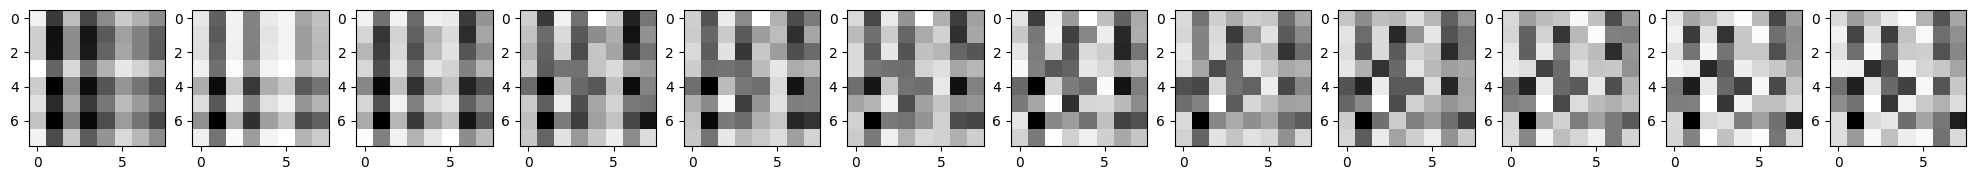

In [83]:
figure, axis = plt.subplots(1, len(dimensions), figsize=(25,15))

for i,dim in enumerate(dimensions):
  R_50 = U_noi_50[:,:dim].dot(np.diag(s_noi_50[:dim])).dot(V_T_noi_50[:dim, :])
  axis[i].imshow(R_50[2].reshape((8,8)), cmap='Greys')

## Matice č. 2, nejlepší výsledek - redukce na 12 dimenzí

## Task 2(1p) : Dimension reduction and visualization of clustering results

We have tried some clustering for **Country data** last week. I have copied the most important cells into this notebook.

1. Fill in any clustering method for our dataset **Country data**, you can use already scaled matrix **X_scaled**.
2. Lets use other dimension reduction techniques: PCA and TSNE from sklearn library and get 2D space representation for our matrix **X_scaled**.
3. Use 2D representation from dimension reduction methods for 2D visualization of **Country data** and use color for displaying clusters found in matrix **X_scaled** - create at least two scatter plots for data points and use cluster_id as point's color.

- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
- https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [84]:
df = pd.read_csv('country-data.csv')
df_only_numeric = df.select_dtypes(np.number)
scaler = sklearn.preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(df_only_numeric.values)

### Clustering

Use any clustering method for preprocessed data.

Be aware to apply clustering for **X_scaled**, which is n-diminensional data. Do not use clustering only on 2D representation after dimension reduction. 

In [85]:
clustering = sklearn.cluster.KMeans(n_clusters = 5)
clustering.fit(X_scaled)

KMeans(n_clusters=5)

In [86]:
pd.Series(clustering.labels_).value_counts()

4    52
2    46
1    38
3    28
0     3
dtype: int64

In [87]:
clustering.labels_

array([2, 4, 1, 2, 4, 1, 1, 3, 3, 1, 4, 4, 1, 4, 4, 3, 4, 2, 4, 1, 4, 2,
       1, 3, 4, 2, 2, 4, 2, 3, 4, 2, 2, 1, 1, 1, 2, 2, 2, 4, 2, 4, 3, 4,
       3, 1, 1, 1, 4, 2, 2, 4, 4, 3, 3, 2, 2, 4, 3, 2, 3, 4, 1, 2, 2, 4,
       2, 4, 3, 1, 1, 1, 1, 3, 3, 3, 1, 3, 4, 1, 2, 2, 3, 4, 2, 4, 4, 2,
       2, 1, 4, 0, 4, 2, 2, 4, 4, 2, 0, 2, 4, 4, 4, 1, 4, 1, 2, 1, 2, 1,
       3, 3, 2, 2, 3, 1, 2, 4, 4, 1, 1, 4, 3, 3, 1, 1, 2, 4, 1, 2, 4, 4,
       2, 0, 4, 4, 4, 2, 4, 3, 1, 4, 2, 4, 3, 3, 1, 2, 4, 2, 2, 1, 4, 1,
       4, 2, 4, 3, 3, 3, 1, 1, 4, 1, 4, 2, 2])

### 2D vis

In [88]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [89]:
pca = PCA(n_components=2)

dimension_reduction = pca.fit_transform(X_scaled)

<AxesSubplot: >

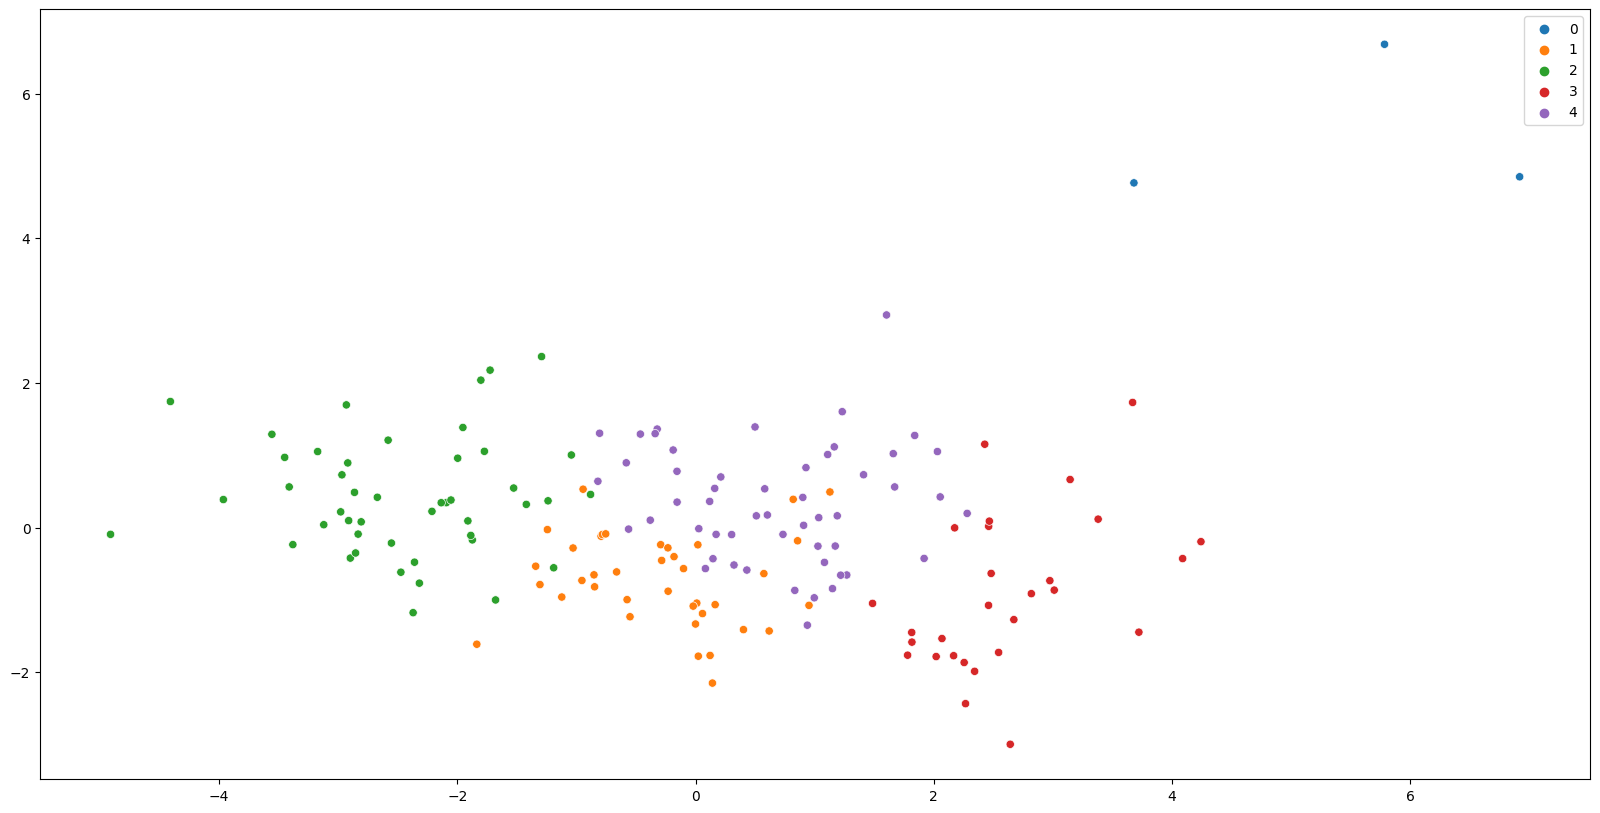

In [90]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=dimension_reduction[:,0], y = dimension_reduction[:,1], hue=clustering.labels_, palette='tab10')

In [91]:
tsne = TSNE(n_components=2)

dimension_reduction = tsne.fit_transform(X_scaled)

c:\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot: >

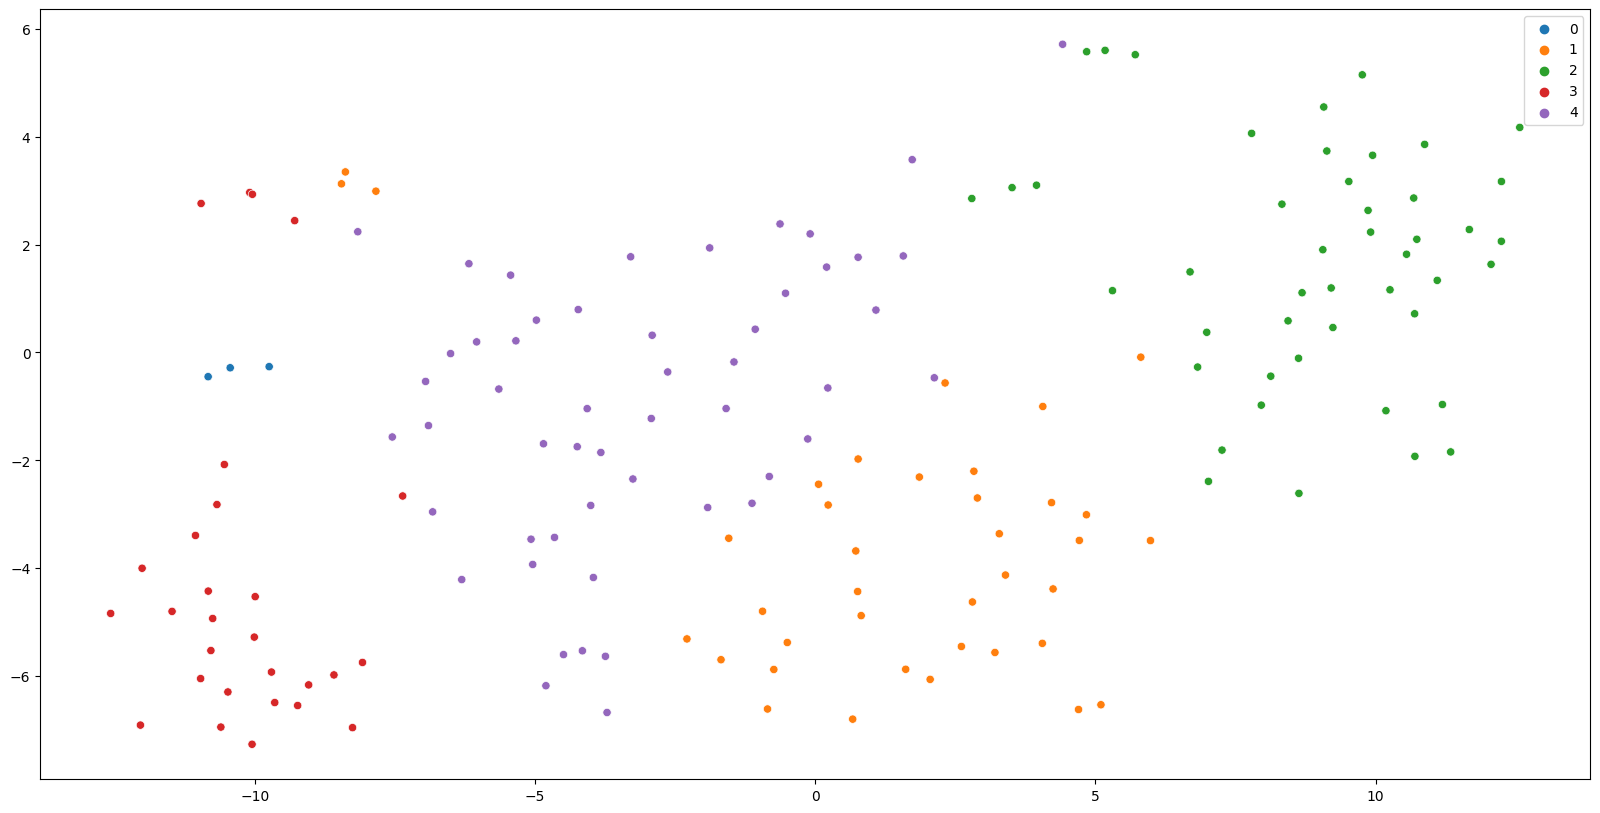

In [92]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=dimension_reduction[:,0], y = dimension_reduction[:,1], hue=clustering.labels_, palette='tab10')

## Sample output of 2D visualization obtained by PCA method with labels from k-Means clustering

![obrazek.png](attachment:04b2ce78-971c-4299-b406-092bfe9d08e7.png)

kdyz se dela shlukovani s PCA, tak se shlukovani dela nad puvodnimi daty a potom se az dela ta redukce na treba 2 parametry - nikdy NAOPAK